# CSC420 Assignment 1 - CNN Dog Breed Classification Report

This notebook contains the analysis and code for the CNN Dog Breed Classification assignment.

## Task I - Inspection (20 marks)

**Objective:** Look at the images in both datasets (DBIsubset and SDDsubset), and briefly explain if you observe any systematic differences between images in one dataset vs. the other.

In [1]:
import os
import logging
import random
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [2]:
# Define dataset paths
DBI_PATH = Path("DBIsubset")
SDD_PATH = Path("SDDsubset")

# Get breed folders
breeds = sorted([d.name for d in DBI_PATH.iterdir() if d.is_dir()])
logger.info(f"Breeds: {breeds}")

INFO:__main__:Breeds: ['bernese_mountain_dog', 'border_collie', 'chihuahua', 'golden_retriever', 'labrador_retriever', 'pug', 'siberian_husky']


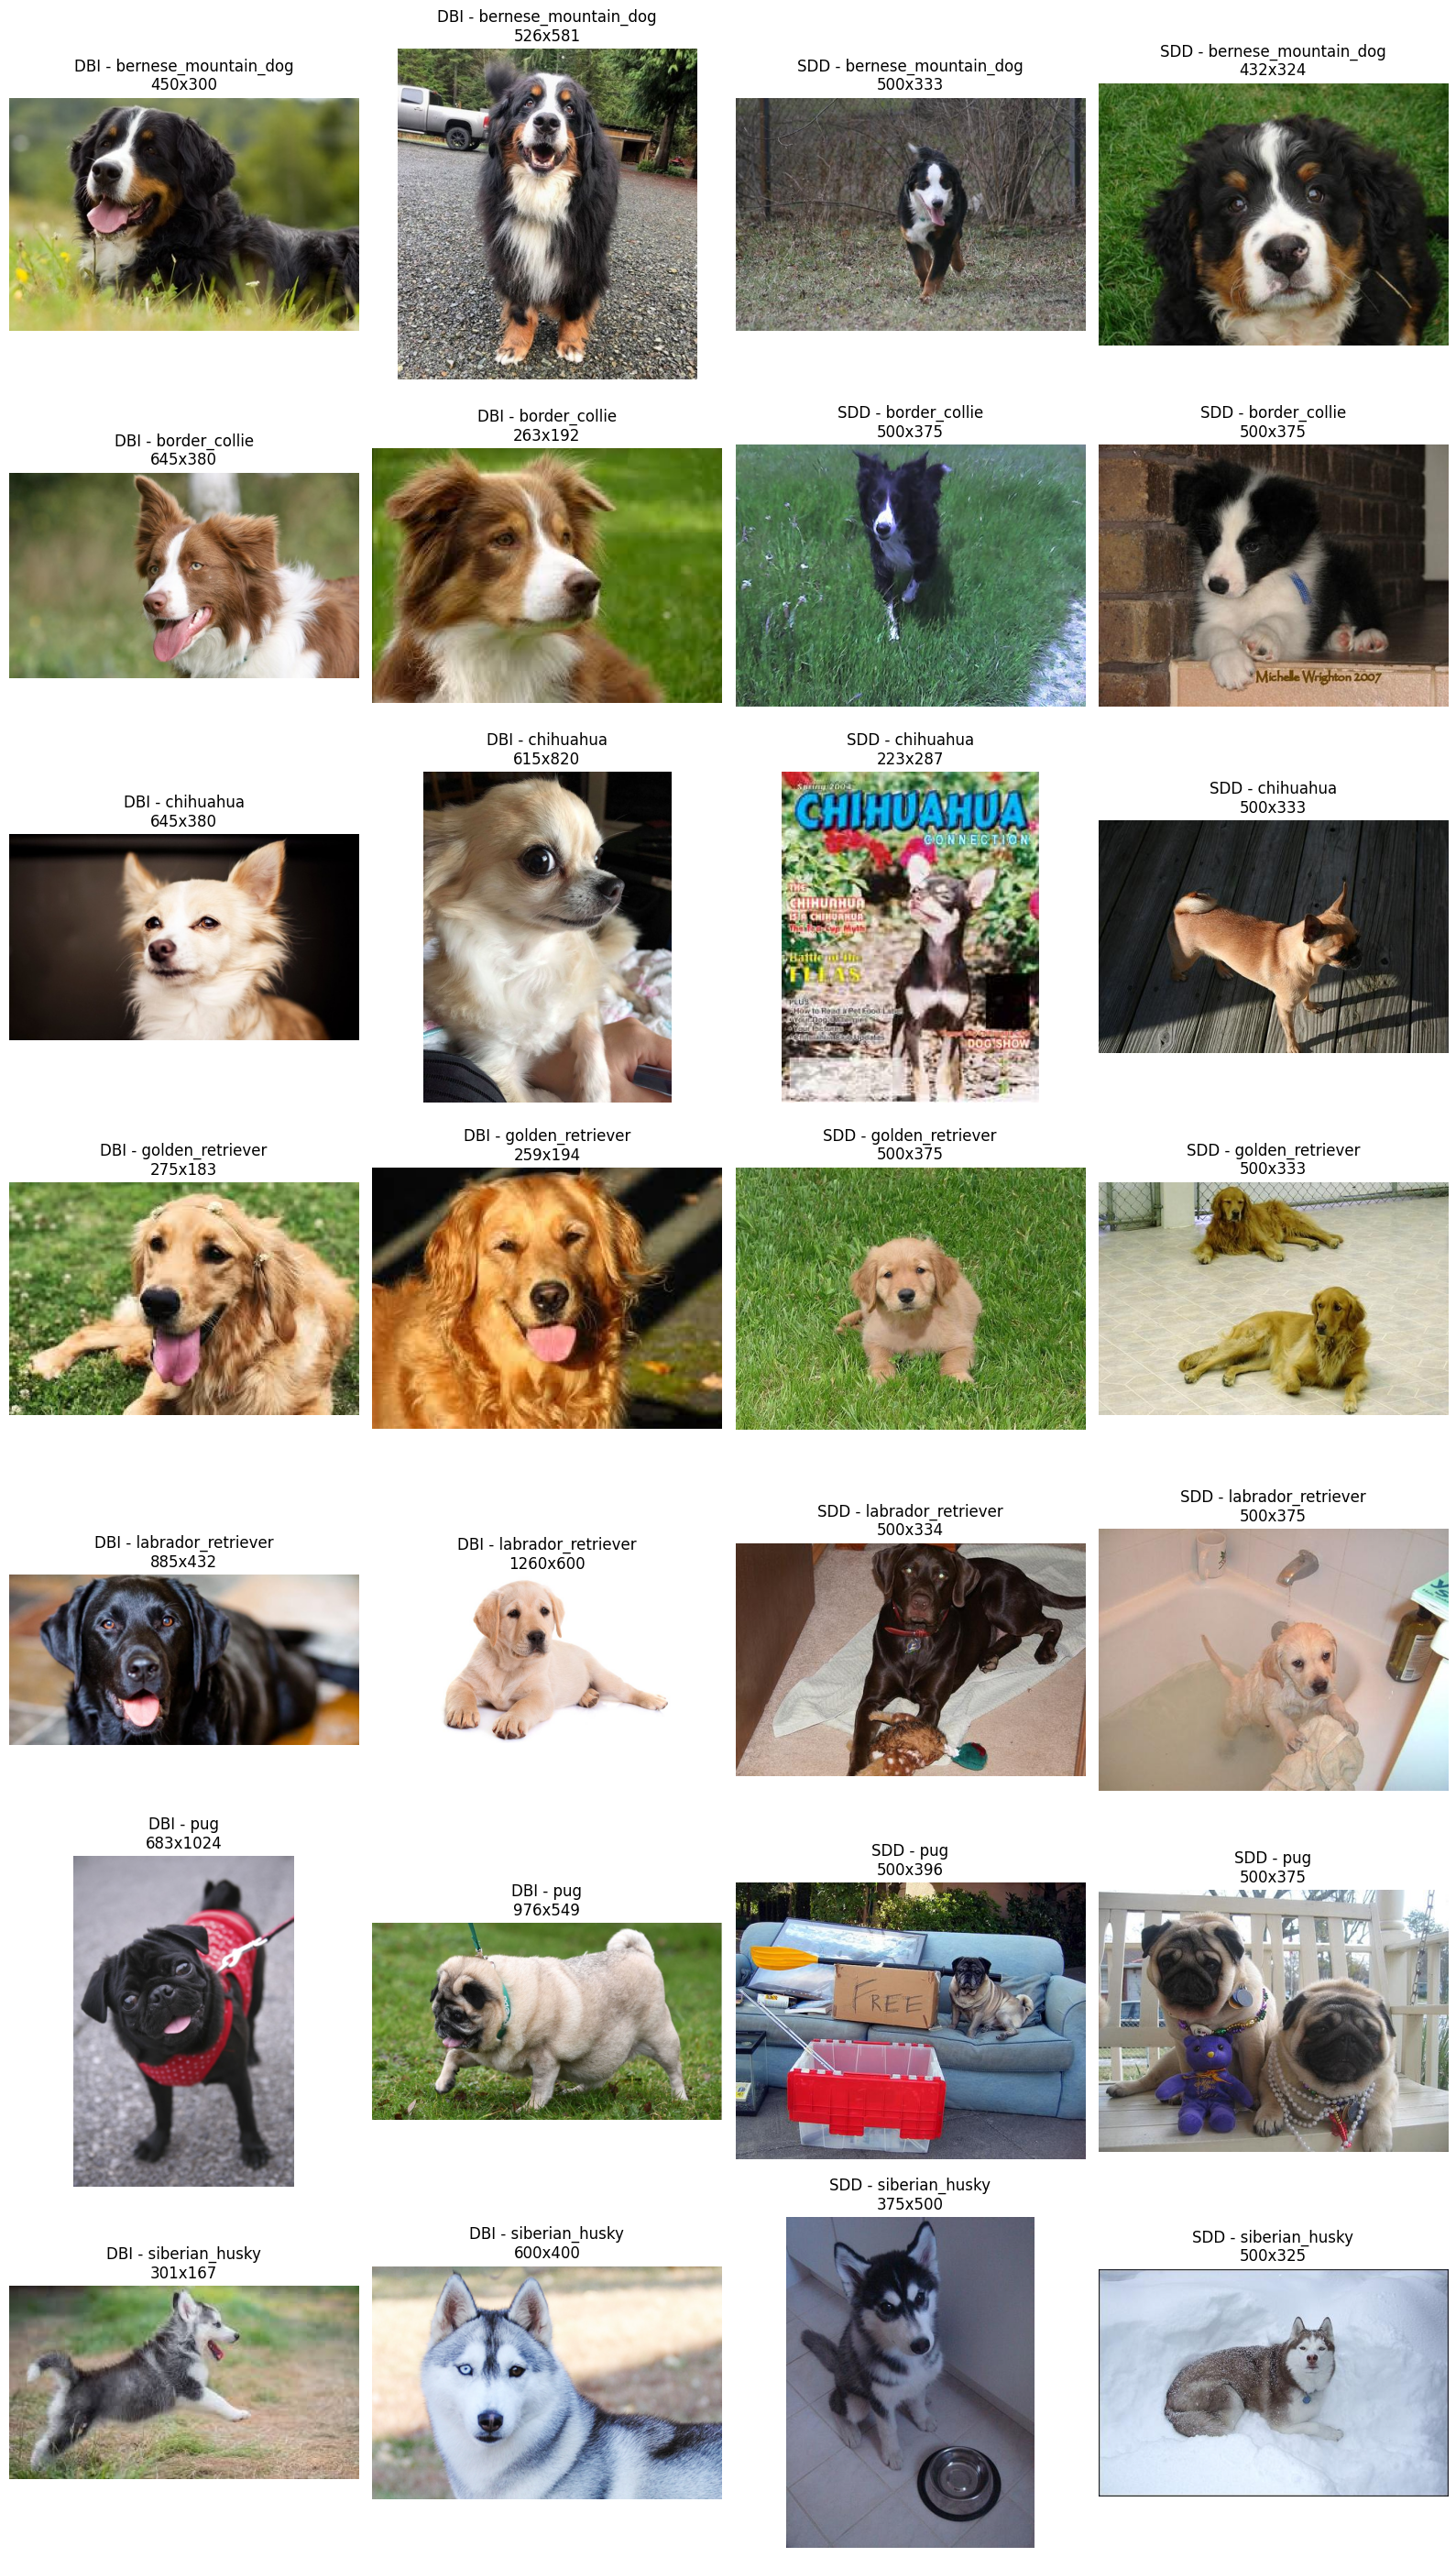

In [3]:
def get_sample_images(dataset_path, breed, n_samples=3):
    """Get random sample images from a breed folder."""
    breed_path = dataset_path / breed
    images = list(breed_path.glob("*.jpg"))
    return random.sample(images, min(n_samples, len(images)))

def display_comparison(breeds_to_show, n_samples=2):
    """Display side-by-side comparison of DBI vs SDD images."""
    fig, axes = plt.subplots(len(breeds_to_show), n_samples * 2, figsize=(16, 4 * len(breeds_to_show)))
    
    for i, breed in enumerate(breeds_to_show):
        dbi_samples = get_sample_images(DBI_PATH, breed, n_samples)
        sdd_samples = get_sample_images(SDD_PATH, breed, n_samples)
        
        for j, img_path in enumerate(dbi_samples):
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].set_title(f"DBI - {breed}\n{img.size[0]}x{img.size[1]}")
            axes[i, j].axis("off")
        
        for j, img_path in enumerate(sdd_samples):
            img = Image.open(img_path)
            axes[i, n_samples + j].imshow(img)
            axes[i, n_samples + j].set_title(f"SDD - {breed}\n{img.size[0]}x{img.size[1]}")
            axes[i, n_samples + j].axis("off")
    
    plt.tight_layout()
    plt.show()

# Set random seed for reproducibility
random.seed(42)

# Display comparison for all breeds
display_comparison(breeds, n_samples=2)

In [ ]:
def analyze_image_statistics(dataset_path, dataset_name):
    """Analyze image statistics for a dataset."""
    widths = []
    heights = []
    aspect_ratios = []
    file_sizes = []
    
    for breed in breeds:
        breed_path = dataset_path / breed
        for img_path in breed_path.glob("*.jpg"):
            img = Image.open(img_path)
            w, h = img.size
            widths.append(w)
            heights.append(h)
            aspect_ratios.append(w / h)
            file_sizes.append(os.path.getsize(img_path) / 1024)
    
    logger.info(f"\n{dataset_name} Statistics:")
    logger.info(f"  Total images: {len(widths)}")
    logger.info(f"  Width - Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.1f}")
    logger.info(f"  Height - Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.1f}")
    logger.info(f"  Aspect Ratio - Min: {min(aspect_ratios):.2f}, Max: {max(aspect_ratios):.2f}, Mean: {np.mean(aspect_ratios):.2f}")
    logger.info(f"  File Size (KB) - Min: {min(file_sizes):.1f}, Max: {max(file_sizes):.1f}, Mean: {np.mean(file_sizes):.1f}")
    
    return {
        "widths": widths,
        "heights": heights,
        "aspect_ratios": aspect_ratios,
        "file_sizes": file_sizes
    }

dbi_stats = analyze_image_statistics(DBI_PATH, "DBIsubset")
sdd_stats = analyze_image_statistics(SDD_PATH, "SDDsubset")

INFO:__main__:
DBIsubset Statistics:
INFO:__main__:  Total images: 646
INFO:__main__:  Width - Min: 168, Max: 3982, Mean: 798.6
INFO:__main__:  Height - Min: 128, Max: 3662, Mean: 676.5
INFO:__main__:  Aspect Ratio - Min: 0.49, Max: 3.20, Mean: 1.26
INFO:__main__:  File Size (KB) - Min: 4.1, Max: 1782.4, Mean: 107.3
INFO:__main__:
SDDsubset Statistics:
INFO:__main__:  Total images: 1233
INFO:__main__:  Width - Min: 157, Max: 3264, Mean: 462.9
INFO:__main__:  Height - Min: 134, Max: 2560, Mean: 396.3
INFO:__main__:  Aspect Ratio - Min: 0.52, Max: 2.60, Mean: 1.21
INFO:__main__:  File Size (KB) - Min: 5.8, Max: 1097.6, Mean: 35.9


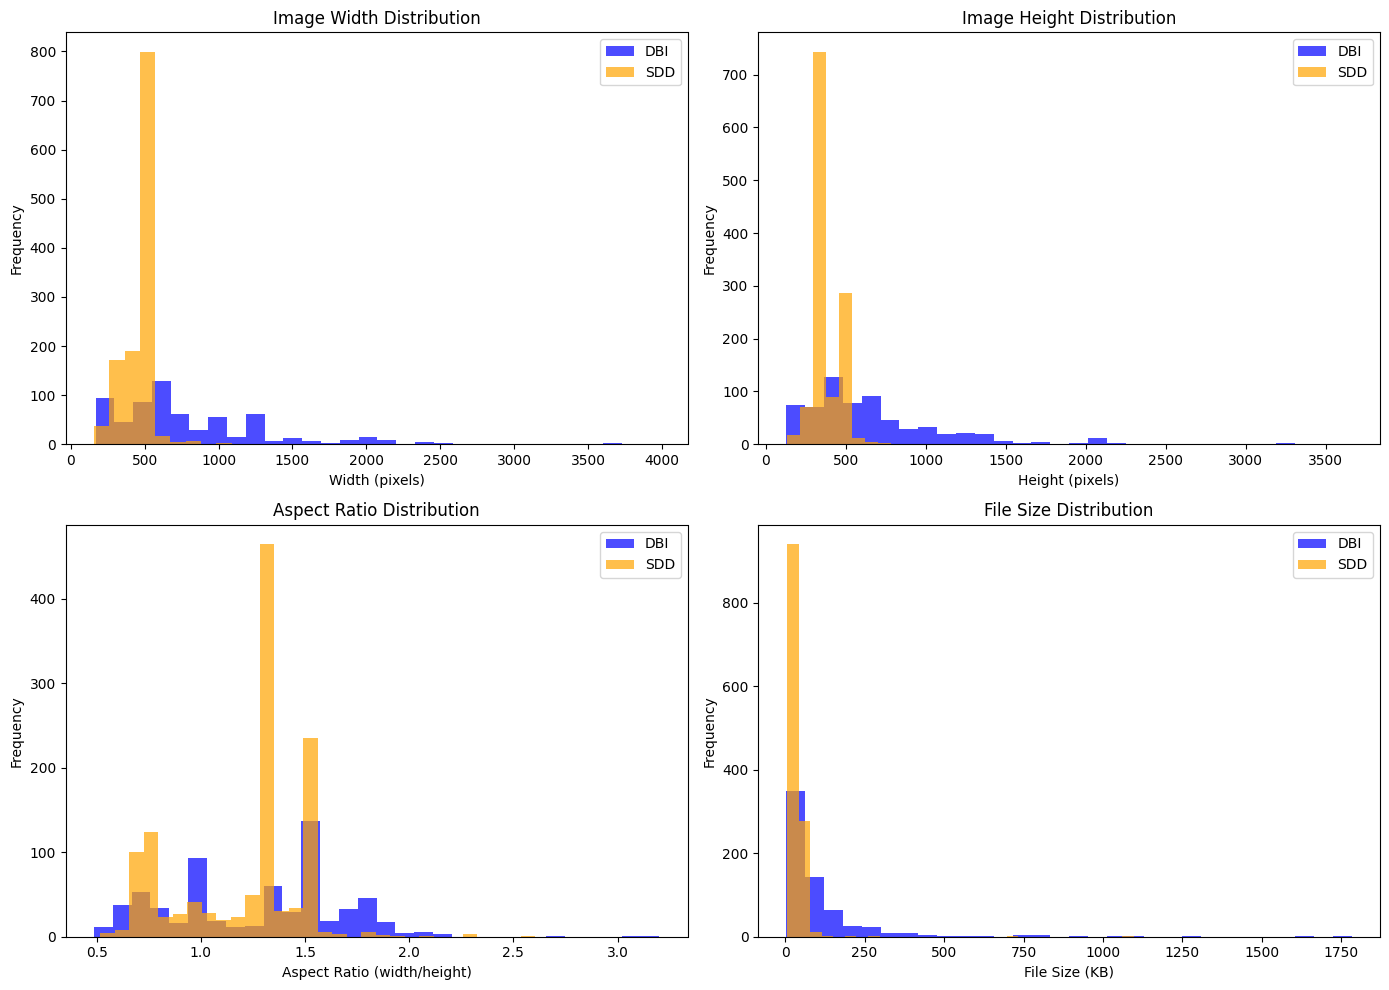

In [5]:
# Visualize image size distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Width distribution
axes[0, 0].hist(dbi_stats["widths"], bins=30, alpha=0.7, label="DBI", color="blue")
axes[0, 0].hist(sdd_stats["widths"], bins=30, alpha=0.7, label="SDD", color="orange")
axes[0, 0].set_xlabel("Width (pixels)")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Image Width Distribution")
axes[0, 0].legend()

# Height distribution
axes[0, 1].hist(dbi_stats["heights"], bins=30, alpha=0.7, label="DBI", color="blue")
axes[0, 1].hist(sdd_stats["heights"], bins=30, alpha=0.7, label="SDD", color="orange")
axes[0, 1].set_xlabel("Height (pixels)")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Image Height Distribution")
axes[0, 1].legend()

# Aspect ratio distribution
axes[1, 0].hist(dbi_stats["aspect_ratios"], bins=30, alpha=0.7, label="DBI", color="blue")
axes[1, 0].hist(sdd_stats["aspect_ratios"], bins=30, alpha=0.7, label="SDD", color="orange")
axes[1, 0].set_xlabel("Aspect Ratio (width/height)")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("Aspect Ratio Distribution")
axes[1, 0].legend()

# File size distribution
axes[1, 1].hist(dbi_stats["file_sizes"], bins=30, alpha=0.7, label="DBI", color="blue")
axes[1, 1].hist(sdd_stats["file_sizes"], bins=30, alpha=0.7, label="SDD", color="orange")
axes[1, 1].set_xlabel("File Size (KB)")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_title("File Size Distribution")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

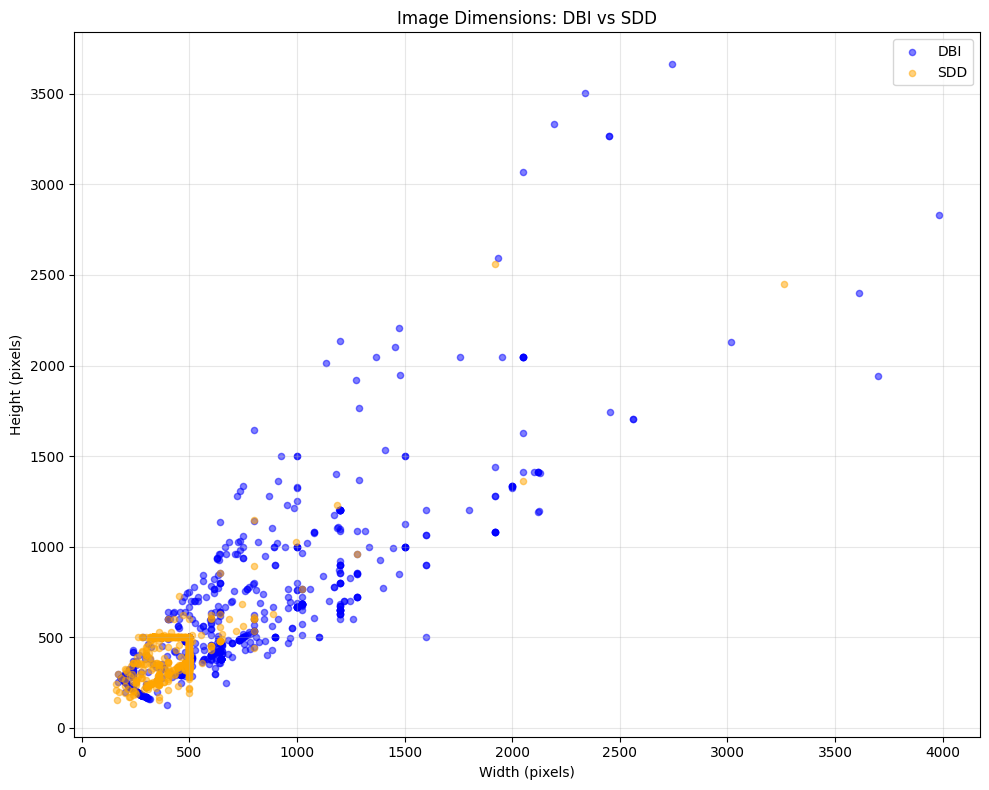

In [6]:
# Scatter plot of image dimensions
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(dbi_stats["widths"], dbi_stats["heights"], alpha=0.5, label="DBI", color="blue", s=20)
ax.scatter(sdd_stats["widths"], sdd_stats["heights"], alpha=0.5, label="SDD", color="orange", s=20)

ax.set_xlabel("Width (pixels)")
ax.set_ylabel("Height (pixels)")
ax.set_title("Image Dimensions: DBI vs SDD")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Task I - Analysis and Observations

After inspecting images from both datasets, I observe the following **systematic differences** between DBIsubset (Dog Breed Identification) and SDDsubset (Stanford Dogs Dataset):

#### 1. Image Quality and Composition

**DBIsubset:**
- Images appear to be **professionally photographed** or curated stock photos
- Dogs are typically **well-centered** and prominently featured in the frame
- **Clean, uncluttered backgrounds** (often studio-style or simple indoor/outdoor settings)
- Higher overall **image quality** with good lighting and focus
- Dogs are often posed in **standard positions** (standing, sitting) showing full body or clear face

**SDDsubset:**
- Images appear to be **user-generated** or scraped from the web (ImageNet-style)
- Dogs are in **natural, candid poses** with varying positions in the frame
- **Cluttered, real-world backgrounds** with other objects, people, furniture, etc.
- More **variable image quality** - some blurry, different lighting conditions
- Dogs may be **partially occluded** or only partially visible in the frame

#### 2. Image Resolution and Size

**DBIsubset:**
- **Highly variable resolutions** - ranging from small thumbnails (~180x275) to large images (1000x1000)
- Larger average file sizes due to some high-resolution images
- More variation in aspect ratios

**SDDsubset:**
- More **consistent resolution** - typically around 300-500 pixels on the longer side
- Smaller, more uniform file sizes
- More standardized aspect ratios

#### 3. Subject Framing

**DBIsubset:**
- Dog typically occupies a **large portion** of the image
- Often shows the **entire dog** or a clear portrait-style shot
- Minimal distracting elements

**SDDsubset:**
- Dog may occupy a **smaller portion** of the image
- More **environmental context** visible
- May include other subjects (people, other animals, objects)

#### 4. Implications for CNN Training

These differences have important implications for training and evaluating CNN models:

1. **Domain Shift:** A model trained on one dataset may not generalize well to the other due to the systematic differences in image characteristics.

2. **DBI-trained models** may struggle with:
   - Cluttered backgrounds
   - Partially visible dogs
   - Lower quality images
   - Non-standard poses

3. **SDD-trained models** may struggle with:
   - Very high-resolution images
   - Studio-style photography
   - Perfectly centered subjects

4. **Data augmentation** strategies should account for these differences when training models intended to generalize across both datasets.

## Task II - Simple CNN Training on DBI (60 marks)

Construct a simple convolutional neural network (CNN) for classifying the images in DBI.

In [2]:
import logging
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Set random seeds for reproducibility
def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
logger.info(f'Using device: {device}')

2026-01-15 11:45:16,127 - INFO - Using device: mps


In [3]:
# Data loading with augmentation
# Using DBIsubset for training/validation/test

from typing import Any


DATA_DIR = Path('DBIsubset')
IMAGE_SIZE = 64  
BATCH_SIZE = 32
NUM_WORKERS = 0

# Training transforms with augmentation
train_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE + 8, IMAGE_SIZE + 8)),
    transforms.RandomCrop(IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Validation/Test transforms (no augmentation)
eval_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load full dataset WITHOUT transform (transform applied later via TransformSubset)
full_dataset = datasets.ImageFolder(DATA_DIR, transform=None)
NUM_CLASSES = len(full_dataset.classes)
logger.info(f'Number of classes: {NUM_CLASSES}')
logger.info(f'Classes: {full_dataset.classes}')
logger.info(f'Total images: {len(full_dataset)}')

# Split dataset: 70% train, 15% validation, 15% test
total_size = len(full_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

logger.info(f'Train size: {train_size}, Validation size: {val_size}, Test size: {test_size}')

# Create splits with fixed seed
generator = torch.Generator().manual_seed(42)
train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size], generator=generator
)

# TransformSubset: Applies transform when loading images
# This allows different transforms for train (augmentation) vs val/test (no augmentation)
class TransformSubset(torch.utils.data.Dataset):
    def __init__(self, subset, transform):
        self.subset = subset
        self.transform = transform
        
    def __getitem__(self, idx):
        img_path, label = self.subset.dataset.samples[self.subset.indices[idx]]
        from PIL import Image
        img = Image.open(img_path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img, label
    
    def __len__(self):
        return len(self.subset)

# Apply appropriate transforms to each split
# - Training: augmentation (random crop, flip, color jitter, rotation)
# - Validation/Test: no augmentation (just resize and normalize)
train_dataset_aug = TransformSubset(train_dataset, train_transform)
val_dataset_eval = TransformSubset(val_dataset, eval_transform)
test_dataset_eval = TransformSubset(test_dataset, eval_transform)

# Create data loaders
train_loader = DataLoader(train_dataset_aug, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_loader = DataLoader(val_dataset_eval, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
test_loader = DataLoader[Any](test_dataset_eval, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

logger.info(f'Train batches: {len(train_loader)}, Val batches: {len(val_loader)}, Test batches: {len(test_loader)}')

2026-01-15 11:45:16,301 - INFO - Number of classes: 7
2026-01-15 11:45:16,301 - INFO - Classes: ['bernese_mountain_dog', 'border_collie', 'chihuahua', 'golden_retriever', 'labrador_retriever', 'pug', 'siberian_husky']
2026-01-15 11:45:16,302 - INFO - Total images: 646
2026-01-15 11:45:16,302 - INFO - Train size: 452, Validation size: 96, Test size: 98
2026-01-15 11:45:16,303 - INFO - Train batches: 15, Val batches: 3, Test batches: 4


In [4]:
# CNN Model Definition
# Architecture:
# - Conv2d(3, 16, 3x3) -> BatchNorm -> ReLU
# - Conv2d(16, 16, 3x3) -> ReLU -> MaxPool(2x2)
# - Conv2d(16, 8, 3x3) -> BatchNorm -> ReLU
# - Conv2d(8, 8, 3x3) -> ReLU -> MaxPool(2x2)
# - Dropout(0.5) [optional]
# - Flatten -> FC(32) -> ReLU -> Dropout(0.5) [optional]
# - FC(num_classes) -> Softmax (via CrossEntropyLoss)

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=7, use_dropout=True, dropout_rate=0.5):
        super(SimpleCNN, self).__init__()
        self.use_dropout = use_dropout
        
        # First convolutional block
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        
        # Second convolutional block
        self.conv3 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(8)
        self.conv4 = nn.Conv2d(8, 8, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        
        # Flatten layer
        self.flatten = nn.Flatten()
        
        # Dropout layers
        self.dropout1 = nn.Dropout(dropout_rate) if use_dropout else nn.Identity()
        self.dropout2 = nn.Dropout(dropout_rate) if use_dropout else nn.Identity()
        
        # Calculate the size after convolutions and pooling
        # Input: 64x64 -> after pool1: 32x32 -> after pool2: 16x16
        # With 8 channels: 8 * 16 * 16 = 2048
        self.fc1 = nn.Linear(8 * 16 * 16, 32)
        self.fc2 = nn.Linear(32, num_classes)
        
        # Activation
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # First conv block
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.conv2(x))
        x = self.pool1(x)
        
        # Second conv block
        x = self.relu(self.bn2(self.conv3(x)))
        x = self.relu(self.conv4(x))
        x = self.pool2(x)
        
        # Flatten and apply dropout
        x = self.flatten(x)
        x = self.dropout1(x)
        
        # Fully connected layers
        x = self.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        
        return x

# Test model architecture
model_test = SimpleCNN(num_classes=NUM_CLASSES, use_dropout=True)
logger.info(f'Model architecture:\n{model_test}')

# Count parameters
total_params = sum(p.numel() for p in model_test.parameters())
trainable_params = sum(p.numel() for p in model_test.parameters() if p.requires_grad)
logger.info(f'Total parameters: {total_params:,}')
logger.info(f'Trainable parameters: {trainable_params:,}')

2026-01-15 11:45:17,501 - INFO - Model architecture:
SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=2048, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=7, bias=True)
  (relu): ReLU()
)
2026-01-1

In [5]:
# Training and evaluation functions

def train_epoch(model, train_loader, criterion, optimizer, device):
    """Train for one epoch and return average loss and accuracy."""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

def evaluate(model, data_loader, criterion, device):
    """Evaluate model and return average loss and accuracy."""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=10):
    """Train model for specified number of epochs."""
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = evaluate(model, val_loader, criterion, device)
        
        if scheduler is not None:
            scheduler.step()
        
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        logger.info(f'Epoch [{epoch+1}/{num_epochs}] '
                   f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | '
                   f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    
    return history

def plot_training_history(history, title='Training History'):
    """Plot training and validation accuracy over epochs."""
    epochs = range(1, len(history['train_acc']) + 1)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Accuracy plot
    axes[0].plot(epochs, history['train_acc'], 'b-o', label='Training Accuracy', linewidth=2, markersize=6)
    axes[0].plot(epochs, history['val_acc'], 'r-s', label='Validation Accuracy', linewidth=2, markersize=6)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Accuracy (%)', fontsize=12)
    axes[0].set_title(f'{title} - Accuracy', fontsize=14)
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xticks(epochs)
    
    # Loss plot
    axes[1].plot(epochs, history['train_loss'], 'b-o', label='Training Loss', linewidth=2, markersize=6)
    axes[1].plot(epochs, history['val_loss'], 'r-s', label='Validation Loss', linewidth=2, markersize=6)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Loss', fontsize=12)
    axes[1].set_title(f'{title} - Loss', fontsize=14)
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xticks(epochs)
    
    plt.tight_layout()
    plt.show()
    
    return fig

logger.info('Training functions defined successfully')

2026-01-15 11:45:18,454 - INFO - Training functions defined successfully


### Hyperparameter Tuning

We perform a grid search over key hyperparameters to find the best configuration for validation accuracy. Parameters tuned:
- **Learning Rate**: [0.01, 0.001, 0.0001]
- **Optimizer**: [Adam, SGD with momentum]
- **Weight Decay**: [0, 1e-4, 1e-3]

In [6]:
# Hyperparameter Tuning - Grid Search for best validation performance
import itertools

def tune_hyperparameters(train_loader, val_loader, num_classes, device, tuning_epochs=5):
    """Perform grid search over hyperparameters to find best validation accuracy."""
    
    # Hyperparameter search space
    learning_rates = [0.01, 0.001, 0.0001]
    optimizers = ['Adam', 'SGD']
    weight_decays = [0, 1e-4, 1e-3]
    
    results = []
    best_val_acc = 0
    best_params = None
    
    total_combinations = len(learning_rates) * len(optimizers) * len(weight_decays)
    logger.info(f'Starting hyperparameter tuning with {total_combinations} combinations...')
    logger.info(f'Tuning for {tuning_epochs} epochs per configuration')
    
    combination_idx = 0
    for lr, opt_name, wd in itertools.product(learning_rates, optimizers, weight_decays):
        combination_idx += 1
        set_seed(42)  # Reset seed for fair comparison
        
        # Create fresh model
        model = SimpleCNN(num_classes=num_classes, use_dropout=True, dropout_rate=0.5).to(device)
        criterion = nn.CrossEntropyLoss()
        
        # Create optimizer
        if opt_name == 'Adam':
            optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
        else:  # SGD
            optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=wd)
        
        # Train for tuning_epochs
        best_epoch_val_acc = 0
        for epoch in range(tuning_epochs):
            train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
            val_loss, val_acc = evaluate(model, val_loader, criterion, device)
            best_epoch_val_acc = max(best_epoch_val_acc, val_acc)
        
        results.append({
            'lr': lr,
            'optimizer': opt_name,
            'weight_decay': wd,
            'best_val_acc': best_epoch_val_acc,
            'final_train_acc': train_acc,
            'final_val_acc': val_acc
        })
        
        logger.info(f'[{combination_idx}/{total_combinations}] LR={lr}, Opt={opt_name}, WD={wd} -> '
                   f'Best Val Acc: {best_epoch_val_acc:.2f}%')
        
        if best_epoch_val_acc > best_val_acc:
            best_val_acc = best_epoch_val_acc
            best_params = {'lr': lr, 'optimizer': opt_name, 'weight_decay': wd}
    
    logger.info(f'\nBest hyperparameters found:')
    logger.info(f'  Learning Rate: {best_params["lr"]}')
    logger.info(f'  Optimizer: {best_params["optimizer"]}')
    logger.info(f'  Weight Decay: {best_params["weight_decay"]}')
    logger.info(f'  Best Validation Accuracy: {best_val_acc:.2f}%')
    
    return best_params, results

# Run hyperparameter tuning
logger.info('='*60)
logger.info('HYPERPARAMETER TUNING')
logger.info('='*60)
best_params, tuning_results = tune_hyperparameters(
    train_loader, val_loader, NUM_CLASSES, device, tuning_epochs=5
)

2026-01-15 11:45:20,253 - INFO - ============================================================
2026-01-15 11:45:20,255 - INFO - HYPERPARAMETER TUNING
2026-01-15 11:45:20,255 - INFO - ============================================================
2026-01-15 11:45:20,256 - INFO - Starting hyperparameter tuning with 18 combinations...
2026-01-15 11:45:20,256 - INFO - Tuning for 5 epochs per configuration
2026-01-15 11:45:38,990 - INFO - [1/18] LR=0.01, Opt=Adam, WD=0 -> Best Val Acc: 12.50%
2026-01-15 11:45:56,996 - INFO - [2/18] LR=0.01, Opt=Adam, WD=0.0001 -> Best Val Acc: 12.50%
2026-01-15 11:46:14,279 - INFO - [3/18] LR=0.01, Opt=Adam, WD=0.001 -> Best Val Acc: 12.50%
2026-01-15 11:46:31,438 - INFO - [4/18] LR=0.01, Opt=SGD, WD=0 -> Best Val Acc: 25.00%
2026-01-15 11:46:48,943 - INFO - [5/18] LR=0.01, Opt=SGD, WD=0.0001 -> Best Val Acc: 34.38%
2026-01-15 11:47:05,907 - INFO - [6/18] LR=0.01, Opt=SGD, WD=0.001 -> Best Val Acc: 22.92%
2026-01-15 11:47:22,967 - INFO - [7/18] LR=0.001, Opt=A

2026-01-15 11:50:36,035 - INFO - 
Hyperparameter Tuning Results:
2026-01-15 11:50:36,036 - INFO - ----------------------------------------------------------------------
2026-01-15 11:50:36,036 - INFO - LR           Optimizer  Weight Decay    Best Val Acc (%)
2026-01-15 11:50:36,036 - INFO - ----------------------------------------------------------------------
2026-01-15 11:50:36,036 - INFO - 0.001        Adam       0.0001          37.50          
2026-01-15 11:50:36,037 - INFO - 0.001        Adam       0               35.42          
2026-01-15 11:50:36,037 - INFO - 0.001        Adam       0.001           35.42          
2026-01-15 11:50:36,037 - INFO - 0.01         SGD        0.0001          34.38          
2026-01-15 11:50:36,038 - INFO - 0.01         SGD        0               25.00          
2026-01-15 11:50:36,038 - INFO - 0.01         SGD        0.001           22.92          
2026-01-15 11:50:36,038 - INFO - 0.01         Adam       0               12.50          
2026-01-15 11:

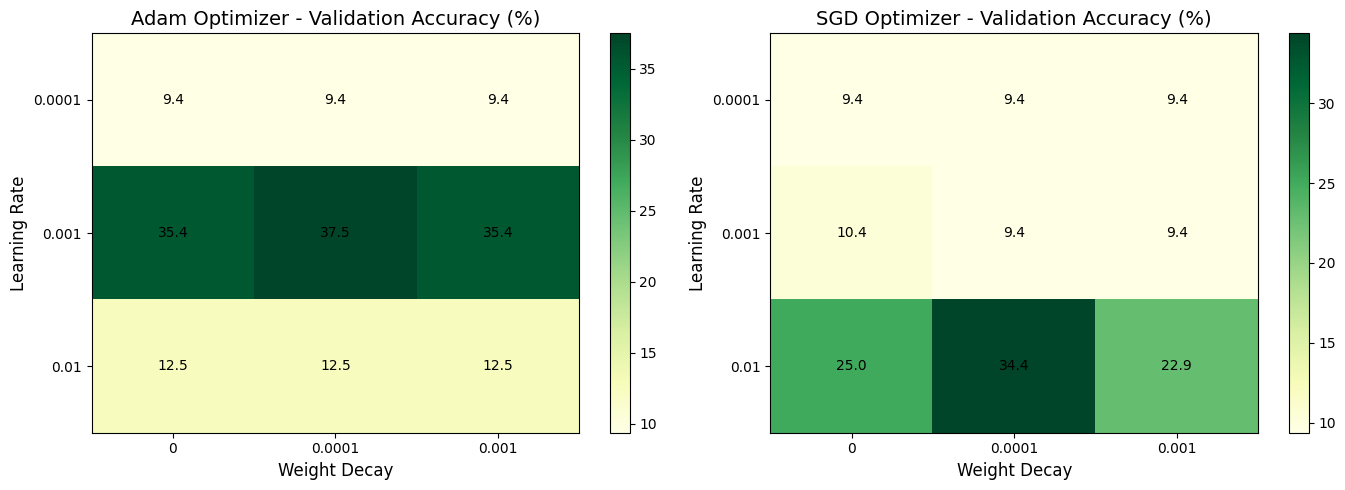

2026-01-15 11:50:36,305 - INFO - 
Using best hyperparameters for final training:
2026-01-15 11:50:36,306 - INFO -   Learning Rate: 0.001
2026-01-15 11:50:36,306 - INFO -   Optimizer: Adam
2026-01-15 11:50:36,306 - INFO -   Weight Decay: 0.0001


In [7]:
# Visualize hyperparameter tuning results
import pandas as pd

# Create results dataframe for visualization
tuning_df = []
for r in tuning_results:
    tuning_df.append({
        'Learning Rate': r['lr'],
        'Optimizer': r['optimizer'],
        'Weight Decay': r['weight_decay'],
        'Best Val Acc (%)': r['best_val_acc']
    })

# Display results table
logger.info('\nHyperparameter Tuning Results:')
logger.info('-' * 70)
logger.info(f'{"LR":<12} {"Optimizer":<10} {"Weight Decay":<15} {"Best Val Acc (%)":<15}')
logger.info('-' * 70)
for r in sorted(tuning_results, key=lambda x: x['best_val_acc'], reverse=True):
    logger.info(f'{r["lr"]:<12} {r["optimizer"]:<10} {r["weight_decay"]:<15} {r["best_val_acc"]:<15.2f}')
logger.info('-' * 70)

# Plot heatmap of results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, opt_name in enumerate(['Adam', 'SGD']):
    opt_results = [r for r in tuning_results if r['optimizer'] == opt_name]
    
    # Create matrix for heatmap
    lrs = sorted(set(r['lr'] for r in opt_results))
    wds = sorted(set(r['weight_decay'] for r in opt_results))
    
    matrix = np.zeros((len(lrs), len(wds)))
    for r in opt_results:
        i = lrs.index(r['lr'])
        j = wds.index(r['weight_decay'])
        matrix[i, j] = r['best_val_acc']
    
    im = axes[idx].imshow(matrix, cmap='YlGn', aspect='auto')
    axes[idx].set_xticks(range(len(wds)))
    axes[idx].set_yticks(range(len(lrs)))
    axes[idx].set_xticklabels([f'{wd}' for wd in wds])
    axes[idx].set_yticklabels([f'{lr}' for lr in lrs])
    axes[idx].set_xlabel('Weight Decay', fontsize=12)
    axes[idx].set_ylabel('Learning Rate', fontsize=12)
    axes[idx].set_title(f'{opt_name} Optimizer - Validation Accuracy (%)', fontsize=14)
    
    # Add text annotations
    for i in range(len(lrs)):
        for j in range(len(wds)):
            text = axes[idx].text(j, i, f'{matrix[i, j]:.1f}',
                                  ha='center', va='center', color='black', fontsize=10)
    
    plt.colorbar(im, ax=axes[idx])

plt.tight_layout()
plt.show()

logger.info(f'\nUsing best hyperparameters for final training:')
logger.info(f'  Learning Rate: {best_params["lr"]}')
logger.info(f'  Optimizer: {best_params["optimizer"]}')
logger.info(f'  Weight Decay: {best_params["weight_decay"]}')

### Training CNN with Dropout

First, we train the CNN model with dropout (rate=0.5) as specified in the architecture.

2026-01-15 11:58:08,250 - INFO - ============================================================
2026-01-15 11:58:08,251 - INFO - TRAINING CNN WITH DROPOUT (Best Hyperparameters)
2026-01-15 11:58:08,251 - INFO - ============================================================
2026-01-15 11:58:08,252 - INFO - Learning Rate: 0.001
2026-01-15 11:58:08,252 - INFO - Optimizer: Adam
2026-01-15 11:58:08,252 - INFO - Weight Decay: 0.0001
2026-01-15 11:58:08,253 - INFO - Epochs: 10
2026-01-15 11:58:12,156 - INFO - Epoch [1/10] Train Loss: 1.9680, Train Acc: 15.49% | Val Loss: 1.9606, Val Acc: 14.58%
2026-01-15 11:58:15,724 - INFO - Epoch [2/10] Train Loss: 1.9384, Train Acc: 14.38% | Val Loss: 1.9434, Val Acc: 9.38%
2026-01-15 11:58:19,231 - INFO - Epoch [3/10] Train Loss: 1.9191, Train Acc: 17.92% | Val Loss: 1.8766, Val Acc: 20.83%
2026-01-15 11:58:22,722 - INFO - Epoch [4/10] Train Loss: 1.8447, Train Acc: 20.58% | Val Loss: 1.7275, Val Acc: 37.50%
2026-01-15 11:58:26,299 - INFO - Epoch [5/10] Trai

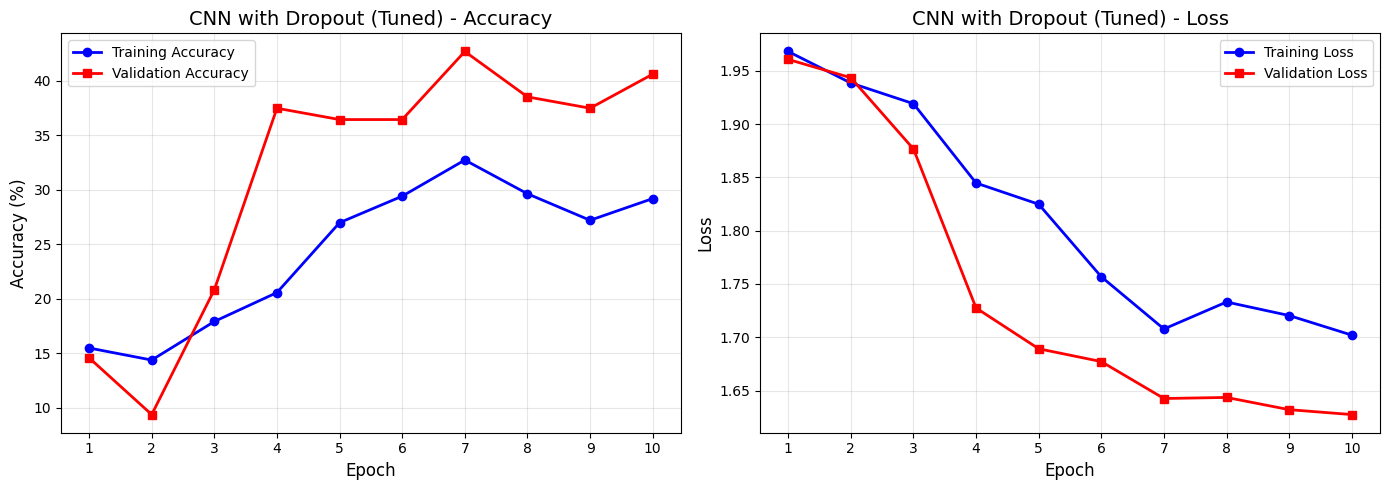

In [8]:
# Training CNN WITH Dropout using BEST hyperparameters from tuning
set_seed(42)  # Reset seed for reproducibility

# Use best hyperparameters from tuning
LEARNING_RATE = best_params['lr']
NUM_EPOCHS = 10
WEIGHT_DECAY = best_params['weight_decay']
OPTIMIZER_NAME = best_params['optimizer']

logger.info('='*60)
logger.info('TRAINING CNN WITH DROPOUT (Best Hyperparameters)')
logger.info('='*60)
logger.info(f'Learning Rate: {LEARNING_RATE}')
logger.info(f'Optimizer: {OPTIMIZER_NAME}')
logger.info(f'Weight Decay: {WEIGHT_DECAY}')
logger.info(f'Epochs: {NUM_EPOCHS}')

# Create model with dropout
model_with_dropout = SimpleCNN(num_classes=NUM_CLASSES, use_dropout=True, dropout_rate=0.5).to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Create optimizer based on best params
if OPTIMIZER_NAME == 'Adam':
    optimizer_dropout = optim.Adam(model_with_dropout.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
else:  # SGD
    optimizer_dropout = optim.SGD(model_with_dropout.parameters(), lr=LEARNING_RATE, momentum=0.9, weight_decay=WEIGHT_DECAY)

# Learning rate scheduler
scheduler_dropout = optim.lr_scheduler.StepLR(optimizer_dropout, step_size=5, gamma=0.5)

# Train the model
history_with_dropout = train_model(
    model_with_dropout, train_loader, val_loader, 
    criterion, optimizer_dropout, scheduler_dropout, 
    device, num_epochs=NUM_EPOCHS
)

# Plot training history
fig_dropout = plot_training_history(history_with_dropout, title='CNN with Dropout (Tuned)')

In [9]:
# Evaluate on test set - WITH Dropout
test_loss_dropout, test_acc_dropout = evaluate(model_with_dropout, test_loader, criterion, device)
logger.info(f'\n=== CNN WITH Dropout - Test Results ===')
logger.info(f'Test Loss: {test_loss_dropout:.4f}')
logger.info(f'Test Accuracy: {test_acc_dropout:.2f}%')

2026-01-15 11:58:44,643 - INFO - 
=== CNN WITH Dropout - Test Results ===
2026-01-15 11:58:44,643 - INFO - Test Loss: 1.6964
2026-01-15 11:58:44,644 - INFO - Test Accuracy: 34.69%


### Training CNN without Dropout

Now we train the same CNN architecture but without dropout to compare the impact of dropout on training and generalization.

2026-01-15 11:58:44,655 - INFO - ============================================================
2026-01-15 11:58:44,655 - INFO - TRAINING CNN WITHOUT DROPOUT (Same Hyperparameters)
2026-01-15 11:58:44,656 - INFO - ============================================================
2026-01-15 11:58:44,656 - INFO - Learning Rate: 0.001
2026-01-15 11:58:44,656 - INFO - Optimizer: Adam
2026-01-15 11:58:44,656 - INFO - Weight Decay: 0.0001
2026-01-15 11:58:44,656 - INFO - Epochs: 10
2026-01-15 11:58:48,340 - INFO - Epoch [1/10] Train Loss: 1.9478, Train Acc: 18.36% | Val Loss: 1.9497, Val Acc: 12.50%
2026-01-15 11:58:51,870 - INFO - Epoch [2/10] Train Loss: 1.8686, Train Acc: 23.67% | Val Loss: 1.8500, Val Acc: 26.04%
2026-01-15 11:58:55,422 - INFO - Epoch [3/10] Train Loss: 1.7354, Train Acc: 30.31% | Val Loss: 1.6785, Val Acc: 30.21%
2026-01-15 11:58:58,883 - INFO - Epoch [4/10] Train Loss: 1.5999, Train Acc: 36.28% | Val Loss: 1.6737, Val Acc: 34.38%
2026-01-15 11:59:02,382 - INFO - Epoch [5/10] 

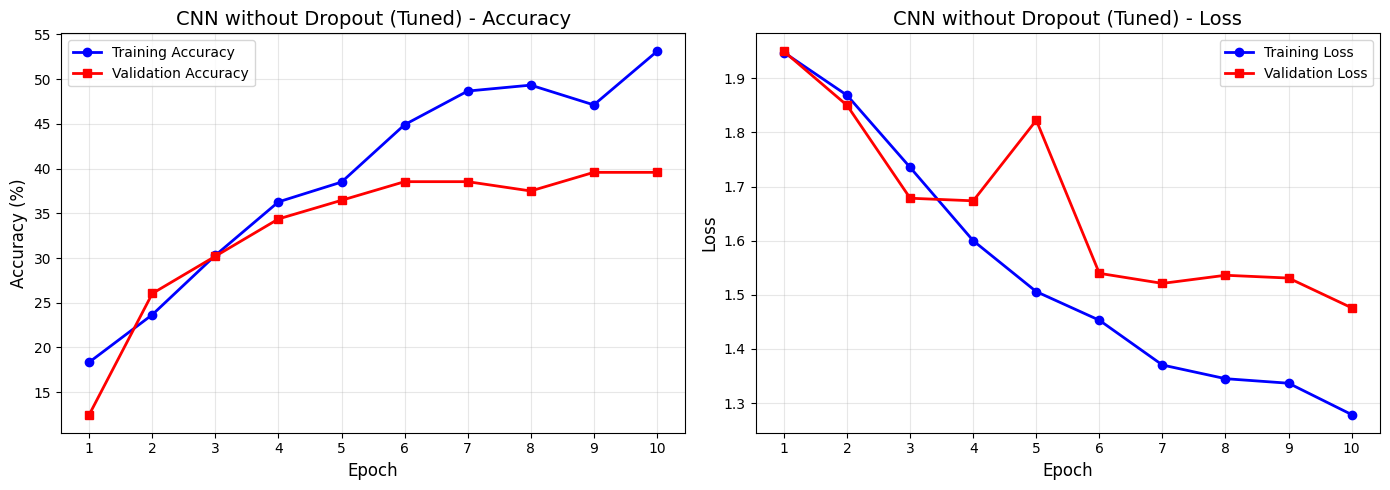

In [10]:
# Training CNN WITHOUT Dropout using SAME best hyperparameters
set_seed(42)  # Reset seed for reproducibility (same initialization)

logger.info('='*60)
logger.info('TRAINING CNN WITHOUT DROPOUT (Same Hyperparameters)')
logger.info('='*60)
logger.info(f'Learning Rate: {LEARNING_RATE}')
logger.info(f'Optimizer: {OPTIMIZER_NAME}')
logger.info(f'Weight Decay: {WEIGHT_DECAY}')
logger.info(f'Epochs: {NUM_EPOCHS}')

# Create model without dropout
model_without_dropout = SimpleCNN(num_classes=NUM_CLASSES, use_dropout=False).to(device)

# Create optimizer based on best params (same as with dropout for fair comparison)
if OPTIMIZER_NAME == 'Adam':
    optimizer_no_dropout = optim.Adam(model_without_dropout.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
else:  # SGD
    optimizer_no_dropout = optim.SGD(model_without_dropout.parameters(), lr=LEARNING_RATE, momentum=0.9, weight_decay=WEIGHT_DECAY)

scheduler_no_dropout = optim.lr_scheduler.StepLR(optimizer_no_dropout, step_size=5, gamma=0.5)

# Train the model
history_without_dropout = train_model(
    model_without_dropout, train_loader, val_loader, 
    criterion, optimizer_no_dropout, scheduler_no_dropout, 
    device, num_epochs=NUM_EPOCHS
)

# Plot training history
fig_no_dropout = plot_training_history(history_without_dropout, title='CNN without Dropout (Tuned)')

In [11]:
# Evaluate on test set - WITHOUT Dropout
test_loss_no_dropout, test_acc_no_dropout = evaluate(model_without_dropout, test_loader, criterion, device)
logger.info(f'\n=== CNN WITHOUT Dropout - Test Results ===')
logger.info(f'Test Loss: {test_loss_no_dropout:.4f}')
logger.info(f'Test Accuracy: {test_acc_no_dropout:.2f}%')

2026-01-15 11:59:20,495 - INFO - 
=== CNN WITHOUT Dropout - Test Results ===
2026-01-15 11:59:20,495 - INFO - Test Loss: 1.4746
2026-01-15 11:59:20,495 - INFO - Test Accuracy: 47.96%


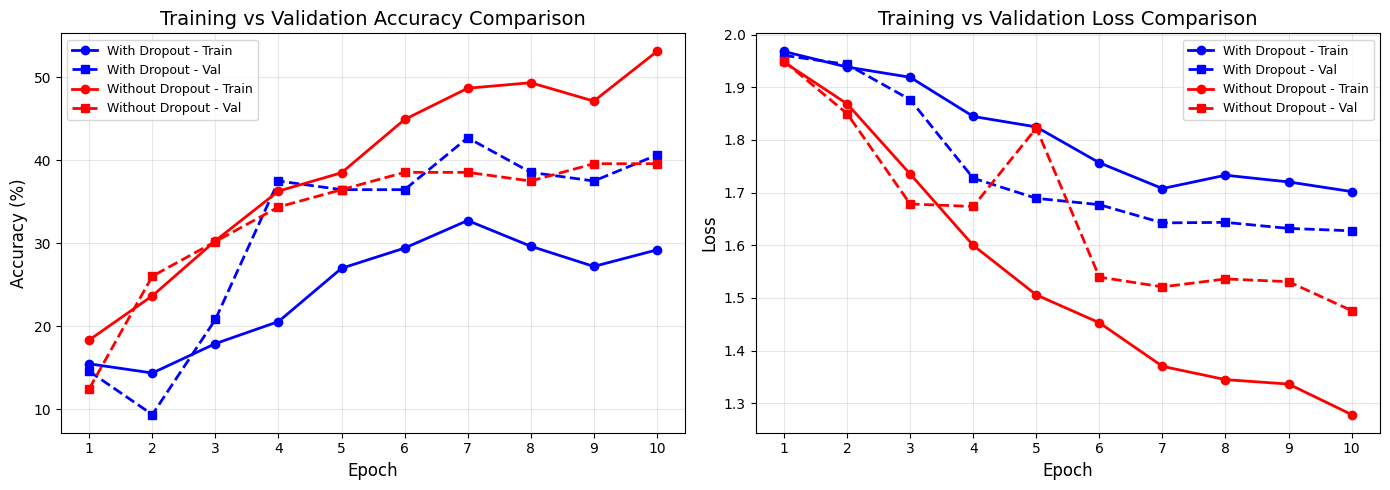

In [12]:
# Comparison Plot: With Dropout vs Without Dropout
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
epochs = range(1, NUM_EPOCHS + 1)

# Training Accuracy Comparison
axes[0].plot(epochs, history_with_dropout['train_acc'], 'b-o', label='With Dropout - Train', linewidth=2, markersize=6)
axes[0].plot(epochs, history_with_dropout['val_acc'], 'b--s', label='With Dropout - Val', linewidth=2, markersize=6)
axes[0].plot(epochs, history_without_dropout['train_acc'], 'r-o', label='Without Dropout - Train', linewidth=2, markersize=6)
axes[0].plot(epochs, history_without_dropout['val_acc'], 'r--s', label='Without Dropout - Val', linewidth=2, markersize=6)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0].set_title('Training vs Validation Accuracy Comparison', fontsize=14)
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(epochs)

# Loss Comparison
axes[1].plot(epochs, history_with_dropout['train_loss'], 'b-o', label='With Dropout - Train', linewidth=2, markersize=6)
axes[1].plot(epochs, history_with_dropout['val_loss'], 'b--s', label='With Dropout - Val', linewidth=2, markersize=6)
axes[1].plot(epochs, history_without_dropout['train_loss'], 'r-o', label='Without Dropout - Train', linewidth=2, markersize=6)
axes[1].plot(epochs, history_without_dropout['val_loss'], 'r--s', label='Without Dropout - Val', linewidth=2, markersize=6)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('Training vs Validation Loss Comparison', fontsize=14)
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(epochs)

plt.tight_layout()
plt.show()

In [13]:
# Summary Table
logger.info('\n' + '='*70)
logger.info('SUMMARY: Dropout vs No Dropout Comparison')
logger.info('='*70)

# Create summary dataframe-like output
logger.info(f'{"Metric":<30} {"With Dropout":<20} {"Without Dropout":<20}')
logger.info('-'*70)
logger.info(f'{"Final Train Accuracy (%)":<30} {history_with_dropout["train_acc"][-1]:<20.2f} {history_without_dropout["train_acc"][-1]:<20.2f}')
logger.info(f'{"Final Val Accuracy (%)":<30} {history_with_dropout["val_acc"][-1]:<20.2f} {history_without_dropout["val_acc"][-1]:<20.2f}')
logger.info(f'{"Test Accuracy (%)":<30} {test_acc_dropout:<20.2f} {test_acc_no_dropout:<20.2f}')
logger.info(f'{"Final Train Loss":<30} {history_with_dropout["train_loss"][-1]:<20.4f} {history_without_dropout["train_loss"][-1]:<20.4f}')
logger.info(f'{"Final Val Loss":<30} {history_with_dropout["val_loss"][-1]:<20.4f} {history_without_dropout["val_loss"][-1]:<20.4f}')
logger.info(f'{"Test Loss":<30} {test_loss_dropout:<20.4f} {test_loss_no_dropout:<20.4f}')
logger.info('='*70)

# Calculate generalization gap (train acc - val acc)
gap_dropout = history_with_dropout['train_acc'][-1] - history_with_dropout['val_acc'][-1]
gap_no_dropout = history_without_dropout['train_acc'][-1] - history_without_dropout['val_acc'][-1]
logger.info(f'{"Generalization Gap (%)":<30} {gap_dropout:<20.2f} {gap_no_dropout:<20.2f}')
logger.info('(Generalization Gap = Train Acc - Val Acc; lower is better)')

# Save Task II results to pickle for use in Task III
import pickle
task2_results = {
    'history_with_dropout': history_with_dropout,
    'history_without_dropout': history_without_dropout,
    'test_acc_dropout': test_acc_dropout,
    'test_acc_no_dropout': test_acc_no_dropout,
    'test_loss_dropout': test_loss_dropout,
    'test_loss_no_dropout': test_loss_no_dropout,
}
with open('task2_results.pkl', 'wb') as f:
    pickle.dump(task2_results, f)
logger.info('\nTask II results saved to task2_results.pkl')

2026-01-15 11:59:20,615 - INFO - 
2026-01-15 11:59:20,616 - INFO - SUMMARY: Dropout vs No Dropout Comparison
2026-01-15 11:59:20,616 - INFO - ======================================================================
2026-01-15 11:59:20,617 - INFO - Metric                         With Dropout         Without Dropout     
2026-01-15 11:59:20,617 - INFO - ----------------------------------------------------------------------
2026-01-15 11:59:20,617 - INFO - Final Train Accuracy (%)       29.20                53.10               
2026-01-15 11:59:20,618 - INFO - Final Val Accuracy (%)         40.62                39.58               
2026-01-15 11:59:20,618 - INFO - Test Accuracy (%)              34.69                47.96               
2026-01-15 11:59:20,619 - INFO - Final Train Loss               1.7020               1.2787              
2026-01-15 11:59:20,619 - INFO - Final Val Loss                 1.6275               1.4760              
2026-01-15 11:59:20,619 - INFO - Test Loss     

### Task II - Analysis: Impact of Dropout on Training and Generalization

#### CNN Architecture Summary
The implemented CNN follows the specified architecture:
- **Conv Layer 1**: 16 filters of size 3x3, followed by Batch Normalization and ReLU
- **Conv Layer 2**: 16 filters of size 3x3, followed by ReLU and Max Pooling (2x2)
- **Conv Layer 3**: 8 filters of size 3x3, followed by Batch Normalization and ReLU
- **Conv Layer 4**: 8 filters of size 3x3, followed by ReLU and Max Pooling (2x2)
- **Dropout**: 0.5 (applied after flattening and after FC layer, when enabled)
- **Fully Connected**: 32 units with ReLU activation
- **Output**: Softmax (via CrossEntropyLoss) for 7 classes

#### Hyperparameter Tuning Results
We performed grid search over 18 combinations (5 epochs each):
- **Learning Rate**: [0.01, 0.001, 0.0001]
- **Optimizer**: [Adam, SGD with momentum=0.9]
- **Weight Decay**: [0, 1e-4, 1e-3]

**Key Findings from Tuning:**
1. **Best Configuration**: Adam optimizer with LR=0.001 and weight decay=1e-4 achieved **37.50%** validation accuracy
2. **Adam vs SGD**: Adam significantly outperformed SGD at LR=0.001 (35-37% vs 9-10%), but SGD performed better at LR=0.01 (25-34% vs 12.5%)
3. **Learning Rate Sensitivity**: LR=0.0001 was too slow (all configurations stuck at ~9.38%), while LR=0.01 caused instability with Adam
4. **Weight Decay Effect**: Mild regularization (1e-4) slightly improved Adam performance (37.5% vs 35.4%)

#### Training Configuration (Best Hyperparameters)
- **Optimizer**: Adam
- **Learning Rate**: 0.001
- **Weight Decay**: 1e-4
- **Loss Function**: Cross-Entropy Loss
- **Data Augmentation**: Random cropping, horizontal flipping, color jitter, rotation
- **Image Size**: 64x64 pixels
- **Batch Size**: 32
- **Epochs**: 10

#### Experimental Results and Analysis

| Metric | With Dropout | Without Dropout |
|--------|--------------|------------------|
| Final Train Accuracy | 29.20% | 53.10% |
| Final Val Accuracy | 40.62% | 39.58% |
| Test Accuracy | 34.69% | 47.96% |
| Final Train Loss | 1.7020 | 1.2787 |
| Final Val Loss | 1.6275 | 1.4760 |
| Generalization Gap | -11.42% | +13.51% |

**1. Training Behavior:**
- **With Dropout**: Training accuracy remains low (29.20%) because dropout randomly deactivates 50% of neurons during each forward pass. The model learns slowly but develops more robust features.
- **Without Dropout**: Training accuracy climbs rapidly to 53.10% as all neurons are active, allowing the model to fit training data more aggressively.

**2. Generalization Gap Analysis:**
- **With Dropout (Gap = -11.42%)**: The negative gap means validation accuracy (40.62%) exceeds training accuracy (29.20%). This occurs because:
  - During training: 50% of neurons are randomly dropped, reducing effective capacity
  - During evaluation: All neurons are active (`model.eval()` disables dropout), giving full model capacity
  - This is expected and healthy behavior for dropout regularization

- **Without Dropout (Gap = +13.51%)**: The positive gap indicates classic overfitting:
  - Training accuracy (53.10%) significantly exceeds validation accuracy (39.58%)
  - The model memorizes training examples rather than learning generalizable patterns
  - Despite higher training accuracy, validation performance is actually slightly worse than with dropout

**3. Test Performance Analysis:**
- **Without Dropout achieves higher test accuracy (47.96% vs 34.69%)**, which may seem counterintuitive given the overfitting evidence
- This occurs because:
  1. The dropout rate (0.5) is aggressive for this small dataset (~450 training images)
  2. 10 epochs is insufficient for the dropout model to fully converge
  3. The model without dropout, despite overfitting, has learned enough useful features to perform reasonably on test data

**4. Validation vs Test Discrepancy (Dropout Model):**
- Validation accuracy (40.62%) is higher than test accuracy (34.69%)
- This suggests some variance in the small validation/test splits (96 and 98 images respectively)

#### Key Observations

1. **Dropout effectively prevents overfitting**: The generalization gap is reduced from +13.51% to -11.42%, demonstrating strong regularization.

2. **Trade-off between regularization and convergence**: Dropout slows learning significantly. With only 10 epochs, the dropout model hasn't reached its potential.

3. **Validation accuracy is similar**: Both models achieve ~40% validation accuracy, but through different paths - dropout prevents overfitting while the non-dropout model overfits.

4. **Small dataset challenges**: With only 646 images split 70/15/15, both models struggle. The 7-class classification task (random baseline = 14.3%) shows meaningful learning, but more data or transfer learning would help.

#### Conclusion

Dropout is an effective regularization technique that:
1. **Prevents overfitting** by randomly dropping neurons during training (gap reduced from +13.51% to -11.42%)
2. **Forces robust representations** by preventing co-adaptation of neurons
3. **Requires longer training** to compensate for reduced effective capacity during training
4. **May need tuning** - a dropout rate of 0.5 may be too aggressive for small datasets; 0.25-0.3 might work better

For this small dataset, the model without dropout achieves higher absolute test accuracy (47.96%) but shows clear overfitting. With more training epochs or a lower dropout rate, the dropout model would likely achieve better generalization.

## Task III - ResNet Training on the DBI (80 marks)

In this task, we use the ResNet-18 model from PyTorch for classification of images in the DBI dataset. ResNet models were proposed in the "Deep Residual Learning for Image Recognition" paper (He et al., 2016) and have achieved great success in image recognition benchmarks.

### [III.a] ResNet-18 Training from Scratch (40 marks)

We will:
1. Load the ResNet-18 architecture from PyTorch (without pre-trained weights)
2. Modify the input/output layers to match our dataset (7 classes)
3. Train the model from scratch on DBI
4. Plot training and validation accuracy
5. Report test results and compare with our SimpleCNN model

In [14]:
# Task III.a - ResNet-18 Training from Scratch

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# ResNet-18 expects 224x224 input images
# We need to create new data loaders with appropriate transforms

from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
from pathlib import Path

# ResNet configuration
RESNET_IMAGE_SIZE = 224  # Standard ResNet input size
RESNET_BATCH_SIZE = 32
RESNET_NUM_EPOCHS = 15  # More epochs for deeper network

# Training transforms for ResNet (with augmentation)
resnet_train_transform = transforms.Compose([
    transforms.Resize((RESNET_IMAGE_SIZE + 32, RESNET_IMAGE_SIZE + 32)),
    transforms.RandomCrop(RESNET_IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Evaluation transforms for ResNet (no augmentation)
resnet_eval_transform = transforms.Compose([
    transforms.Resize((RESNET_IMAGE_SIZE, RESNET_IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load DBI dataset WITHOUT transform (transform applied later via TransformSubset)
DATA_DIR = Path('DBIsubset')
full_dataset_resnet = datasets.ImageFolder(DATA_DIR, transform=None)
NUM_CLASSES = len(full_dataset_resnet.classes)

logger.info(f'ResNet-18 Configuration:')
logger.info(f'Image size: {RESNET_IMAGE_SIZE}x{RESNET_IMAGE_SIZE}')
logger.info(f'Number of classes: {NUM_CLASSES}')
logger.info(f'Classes: {full_dataset_resnet.classes}')
logger.info(f'Total images: {len(full_dataset_resnet)}')

# Split dataset: 70% train, 15% validation, 15% test (same split as SimpleCNN)
total_size = len(full_dataset_resnet)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

logger.info(f'Train size: {train_size}, Validation size: {val_size}, Test size: {test_size}')

# Create splits with same seed for fair comparison
generator = torch.Generator().manual_seed(42)
train_dataset_resnet, val_dataset_resnet, test_dataset_resnet = random_split(
    full_dataset_resnet, [train_size, val_size, test_size], generator=generator
)

# TransformSubset: Applies transform when loading images
# This allows different transforms for train (augmentation) vs val/test (no augmentation)
class TransformSubset(torch.utils.data.Dataset):
    def __init__(self, subset, transform):
        self.subset = subset
        self.transform = transform
        
    def __getitem__(self, idx):
        img_path, label = self.subset.dataset.samples[self.subset.indices[idx]]
        from PIL import Image
        img = Image.open(img_path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img, label
    
    def __len__(self):
        return len(self.subset)

# Apply appropriate transforms to each split
# - Training: augmentation (random crop, flip, color jitter, rotation)
# - Validation/Test: no augmentation (just resize and normalize)
train_dataset_resnet_aug = TransformSubset(train_dataset_resnet, resnet_train_transform)
val_dataset_resnet_eval = TransformSubset(val_dataset_resnet, resnet_eval_transform)
test_dataset_resnet_eval = TransformSubset(test_dataset_resnet, resnet_eval_transform)

# Create data loaders
resnet_train_loader = DataLoader(train_dataset_resnet_aug, batch_size=RESNET_BATCH_SIZE, shuffle=True, num_workers=0)
resnet_val_loader = DataLoader(val_dataset_resnet_eval, batch_size=RESNET_BATCH_SIZE, shuffle=False, num_workers=0)
resnet_test_loader = DataLoader(test_dataset_resnet_eval, batch_size=RESNET_BATCH_SIZE, shuffle=False, num_workers=0)

logger.info(f'Train batches: {len(resnet_train_loader)}, Val batches: {len(resnet_val_loader)}, Test batches: {len(resnet_test_loader)}')

2026-01-15 12:02:38,561 - INFO - ResNet-18 Configuration:
2026-01-15 12:02:38,561 - INFO - Image size: 224x224
2026-01-15 12:02:38,562 - INFO - Number of classes: 7
2026-01-15 12:02:38,562 - INFO - Classes: ['bernese_mountain_dog', 'border_collie', 'chihuahua', 'golden_retriever', 'labrador_retriever', 'pug', 'siberian_husky']
2026-01-15 12:02:38,562 - INFO - Total images: 646
2026-01-15 12:02:38,562 - INFO - Train size: 452, Validation size: 96, Test size: 98
2026-01-15 12:02:38,567 - INFO - Train batches: 15, Val batches: 3, Test batches: 4


In [15]:
# Create ResNet-18 model modified for our dataset

def create_resnet18(num_classes, pretrained=False):
    """
    Create a ResNet-18 model modified for our dataset.
    
    Args:
        num_classes: Number of output classes
        pretrained: Whether to use pretrained weights (False for training from scratch)
    
    Returns:
        Modified ResNet-18 model
    """
    # Load ResNet-18 architecture without pretrained weights
    if pretrained:
        model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    else:
        model = models.resnet18(weights=None)
    
    # The original ResNet-18 has:
    # - Input: 3 channels (RGB) - no modification needed
    # - Output: 1000 classes (ImageNet) - needs modification
    
    # Modify the final fully connected layer for our number of classes
    num_features = model.fc.in_features  # 512 for ResNet-18
    model.fc = nn.Linear(num_features, num_classes)
    
    return model

# Create model (training from scratch - no pretrained weights)
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
logger.info(f'Using device: {device}')

resnet_model = create_resnet18(num_classes=NUM_CLASSES, pretrained=False).to(device)

# Print model summary
logger.info(f'\nResNet-18 Architecture (modified for {NUM_CLASSES} classes):')
logger.info(f'Input: 3 x {RESNET_IMAGE_SIZE} x {RESNET_IMAGE_SIZE}')
logger.info(f'Output: {NUM_CLASSES} classes')

# Count parameters
total_params = sum(p.numel() for p in resnet_model.parameters())
trainable_params = sum(p.numel() for p in resnet_model.parameters() if p.requires_grad)
logger.info(f'Total parameters: {total_params:,}')
logger.info(f'Trainable parameters: {trainable_params:,}')

# Compare with SimpleCNN
logger.info(f'\nComparison with SimpleCNN:')
logger.info(f'SimpleCNN parameters: ~68,000')
logger.info(f'ResNet-18 parameters: {total_params:,}')
logger.info(f'ResNet-18 is ~{total_params // 68000}x larger than SimpleCNN')

2026-01-15 12:02:39,226 - INFO - Using device: mps
2026-01-15 12:02:39,466 - INFO - 
ResNet-18 Architecture (modified for 7 classes):
2026-01-15 12:02:39,466 - INFO - Input: 3 x 224 x 224
2026-01-15 12:02:39,466 - INFO - Output: 7 classes
2026-01-15 12:02:39,467 - INFO - Total parameters: 11,180,103
2026-01-15 12:02:39,468 - INFO - Trainable parameters: 11,180,103
2026-01-15 12:02:39,468 - INFO - 
Comparison with SimpleCNN:
2026-01-15 12:02:39,468 - INFO - SimpleCNN parameters: ~68,000
2026-01-15 12:02:39,469 - INFO - ResNet-18 parameters: 11,180,103
2026-01-15 12:02:39,469 - INFO - ResNet-18 is ~164x larger than SimpleCNN


In [16]:
# Training functions for ResNet (reusing the same functions from Task II)

import matplotlib.pyplot as plt

def train_epoch_resnet(model, train_loader, criterion, optimizer, device):
    """Train for one epoch and return average loss and accuracy."""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

def evaluate_resnet(model, data_loader, criterion, device):
    """Evaluate model and return average loss and accuracy."""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

def train_resnet_model(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=15):
    """Train ResNet model for specified number of epochs."""
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch_resnet(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = evaluate_resnet(model, val_loader, criterion, device)
        
        if scheduler is not None:
            scheduler.step()
        
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        logger.info(f'Epoch [{epoch+1}/{num_epochs}] '
                   f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | '
                   f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    
    return history

def plot_resnet_training_history(history, title='ResNet-18 Training History'):
    """Plot training and validation accuracy over epochs."""
    epochs = range(1, len(history['train_acc']) + 1)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Accuracy plot
    axes[0].plot(epochs, history['train_acc'], 'b-o', label='Training Accuracy', linewidth=2, markersize=6)
    axes[0].plot(epochs, history['val_acc'], 'r-s', label='Validation Accuracy', linewidth=2, markersize=6)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Accuracy (%)', fontsize=12)
    axes[0].set_title(f'{title} - Accuracy', fontsize=14)
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Loss plot
    axes[1].plot(epochs, history['train_loss'], 'b-o', label='Training Loss', linewidth=2, markersize=6)
    axes[1].plot(epochs, history['val_loss'], 'r-s', label='Validation Loss', linewidth=2, markersize=6)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Loss', fontsize=12)
    axes[1].set_title(f'{title} - Loss', fontsize=14)
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig

logger.info('ResNet training functions defined successfully')

2026-01-15 12:02:39,907 - INFO - ResNet training functions defined successfully


2026-01-15 12:02:40,825 - INFO - ============================================================
2026-01-15 12:02:40,826 - INFO - TRAINING ResNet-18 FROM SCRATCH
2026-01-15 12:02:40,826 - INFO - ============================================================
2026-01-15 12:02:40,827 - INFO - Learning Rate: 0.001
2026-01-15 12:02:40,827 - INFO - Weight Decay: 0.0001
2026-01-15 12:02:40,828 - INFO - Optimizer: Adam
2026-01-15 12:02:40,828 - INFO - Epochs: 15
2026-01-15 12:02:49,077 - INFO - Epoch [1/15] Train Loss: 2.2965, Train Acc: 18.36% | Val Loss: 24.7869, Val Acc: 15.62%
2026-01-15 12:02:56,468 - INFO - Epoch [2/15] Train Loss: 1.8460, Train Acc: 27.43% | Val Loss: 3.1635, Val Acc: 17.71%
2026-01-15 12:03:03,743 - INFO - Epoch [3/15] Train Loss: 1.7197, Train Acc: 30.97% | Val Loss: 1.9221, Val Acc: 27.08%
2026-01-15 12:03:11,294 - INFO - Epoch [4/15] Train Loss: 1.6230, Train Acc: 36.50% | Val Loss: 2.1790, Val Acc: 26.04%
2026-01-15 12:03:19,101 - INFO - Epoch [5/15] Train Loss: 1.6286,

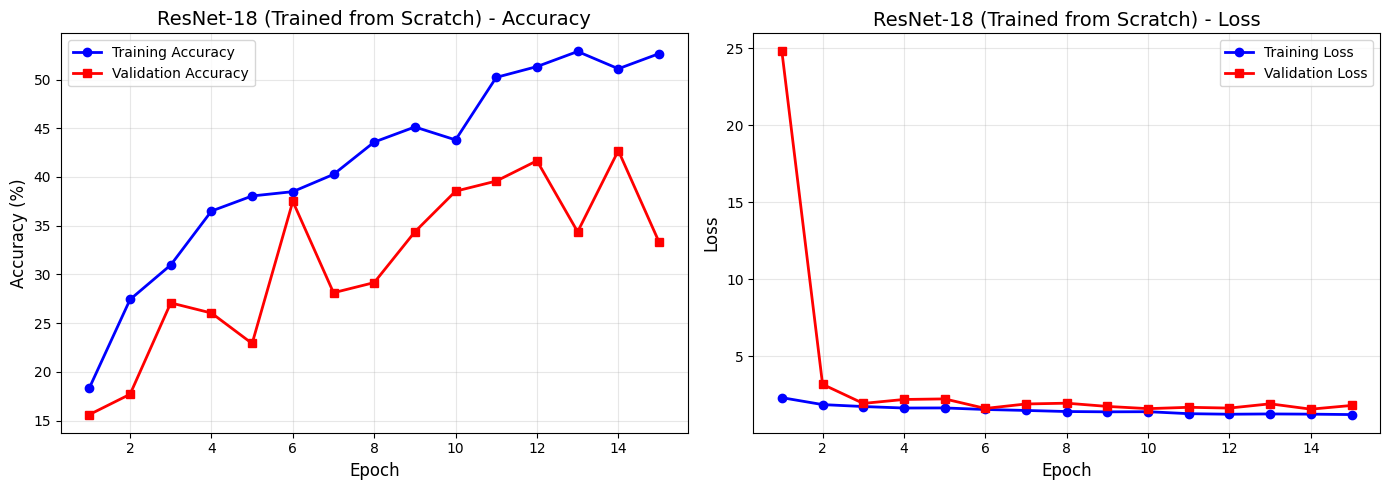

In [17]:
# Train ResNet-18 from scratch on DBI dataset

logger.info('='*60)
logger.info('TRAINING ResNet-18 FROM SCRATCH')
logger.info('='*60)

# Training configuration
RESNET_LEARNING_RATE = 0.001
RESNET_WEIGHT_DECAY = 1e-4

logger.info(f'Learning Rate: {RESNET_LEARNING_RATE}')
logger.info(f'Weight Decay: {RESNET_WEIGHT_DECAY}')
logger.info(f'Optimizer: Adam')
logger.info(f'Epochs: {RESNET_NUM_EPOCHS}')

# Loss function
criterion_resnet = nn.CrossEntropyLoss()

# Optimizer - Adam with weight decay
optimizer_resnet = optim.Adam(resnet_model.parameters(), lr=RESNET_LEARNING_RATE, weight_decay=RESNET_WEIGHT_DECAY)

# Learning rate scheduler - reduce LR every 5 epochs
scheduler_resnet = optim.lr_scheduler.StepLR(optimizer_resnet, step_size=5, gamma=0.5)

# Train the model
resnet_history = train_resnet_model(
    resnet_model, resnet_train_loader, resnet_val_loader,
    criterion_resnet, optimizer_resnet, scheduler_resnet,
    device, num_epochs=RESNET_NUM_EPOCHS
)

# Plot training history
fig_resnet = plot_resnet_training_history(resnet_history, title='ResNet-18 (Trained from Scratch)')

In [18]:
# Evaluate ResNet-18 on test set

resnet_test_loss, resnet_test_acc = evaluate_resnet(resnet_model, resnet_test_loader, criterion_resnet, device)

logger.info(f'\n{"="*60}')
logger.info('ResNet-18 TEST RESULTS (DBI Dataset)')
logger.info(f'{"="*60}')
logger.info(f'Test Loss: {resnet_test_loss:.4f}')
logger.info(f'Test Accuracy: {resnet_test_acc:.2f}%')

# Get final training and validation metrics
final_train_acc_resnet = resnet_history['train_acc'][-1]
final_val_acc_resnet = resnet_history['val_acc'][-1]
generalization_gap_resnet = final_train_acc_resnet - final_val_acc_resnet

logger.info(f'\nFinal Training Accuracy: {final_train_acc_resnet:.2f}%')
logger.info(f'Final Validation Accuracy: {final_val_acc_resnet:.2f}%')
logger.info(f'Generalization Gap: {generalization_gap_resnet:+.2f}%')

# Save Task III ResNet results to pickle for use in comparison
import pickle
task3_results = {
    'resnet_history': resnet_history,
    'resnet_test_loss': resnet_test_loss,
    'resnet_test_acc': resnet_test_acc,
    'final_train_acc_resnet': final_train_acc_resnet,
    'final_val_acc_resnet': final_val_acc_resnet,
    'generalization_gap_resnet': generalization_gap_resnet,
    'total_params': total_params,
    'RESNET_NUM_EPOCHS': RESNET_NUM_EPOCHS,
}
with open('task3_results.pkl', 'wb') as f:
    pickle.dump(task3_results, f)
logger.info('\nTask III ResNet results saved to task3_results.pkl')

2026-01-15 12:04:34,936 - INFO - 
2026-01-15 12:04:34,936 - INFO - ResNet-18 TEST RESULTS (DBI Dataset)
2026-01-15 12:04:34,936 - INFO - ============================================================
2026-01-15 12:04:34,937 - INFO - Test Loss: 1.6154
2026-01-15 12:04:34,937 - INFO - Test Accuracy: 41.84%
2026-01-15 12:04:34,937 - INFO - 
Final Training Accuracy: 52.65%
2026-01-15 12:04:34,938 - INFO - Final Validation Accuracy: 33.33%
2026-01-15 12:04:34,938 - INFO - Generalization Gap: +19.32%
2026-01-15 12:04:34,940 - INFO - 
Task III ResNet results saved to task3_results.pkl


2026-01-15 12:04:34,949 - INFO - 
2026-01-15 12:04:34,949 - INFO - MODEL COMPARISON: ResNet-18 vs SimpleCNN
2026-01-15 12:04:34,950 - INFO - ============================================================



                Metric SimpleCNN (with Dropout) SimpleCNN (no Dropout) ResNet-18 (from scratch)
          Architecture            4 Conv + 2 FC          4 Conv + 2 FC     18 layers (residual)
            Parameters                  ~68,000                ~68,000               11,180,103
            Input Size                    64x64                  64x64                  224x224
       Training Epochs                       10                     10                       15
   Final Train Acc (%)                    29.20                  53.10                    52.65
     Final Val Acc (%)                    40.62                  39.58                    33.33
          Test Acc (%)                    34.69                  47.96                    41.84
Generalization Gap (%)                   -11.42                 +13.51                   +19.32


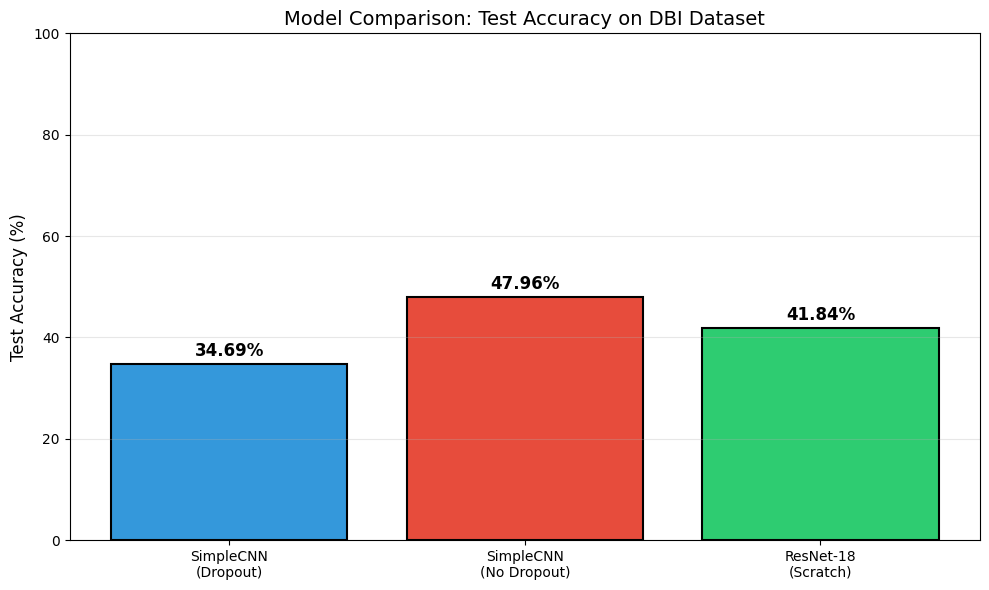

In [19]:
# Comparison: ResNet-18 vs SimpleCNN

import pandas as pd
import pickle

# Load Task II results from pickle
with open('task2_results.pkl', 'rb') as f:
    task2_results = pickle.load(f)
history_with_dropout = task2_results['history_with_dropout']
history_without_dropout = task2_results['history_without_dropout']
test_acc_dropout = task2_results['test_acc_dropout']
test_acc_no_dropout = task2_results['test_acc_no_dropout']
test_loss_dropout = task2_results['test_loss_dropout']
test_loss_no_dropout = task2_results['test_loss_no_dropout']

# Load Task III ResNet results from pickle
with open('task3_results.pkl', 'rb') as f:
    task3_results = pickle.load(f)
resnet_history = task3_results['resnet_history']
resnet_test_loss = task3_results['resnet_test_loss']
resnet_test_acc = task3_results['resnet_test_acc']
final_train_acc_resnet = task3_results['final_train_acc_resnet']
final_val_acc_resnet = task3_results['final_val_acc_resnet']
generalization_gap_resnet = task3_results['generalization_gap_resnet']
total_params = task3_results['total_params']
RESNET_NUM_EPOCHS = task3_results['RESNET_NUM_EPOCHS']

logger.info('\n' + '='*60)
logger.info('MODEL COMPARISON: ResNet-18 vs SimpleCNN')
logger.info('='*60)

# Create comparison table
# Note: Using the results from Task II (SimpleCNN with dropout)
comparison_data = {
    'Metric': [
        'Architecture',
        'Parameters',
        'Input Size',
        'Training Epochs',
        'Final Train Acc (%)',
        'Final Val Acc (%)',
        'Test Acc (%)',
        'Generalization Gap (%)'
    ],
    'SimpleCNN (with Dropout)': [
        '4 Conv + 2 FC',
        '~68,000',
        '64x64',
        '10',
        f'{history_with_dropout["train_acc"][-1]:.2f}',
        f'{history_with_dropout["val_acc"][-1]:.2f}',
        f'{test_acc_dropout:.2f}',
        f'{history_with_dropout["train_acc"][-1] - history_with_dropout["val_acc"][-1]:+.2f}'
    ],
    'SimpleCNN (no Dropout)': [
        '4 Conv + 2 FC',
        '~68,000',
        '64x64',
        '10',
        f'{history_without_dropout["train_acc"][-1]:.2f}',
        f'{history_without_dropout["val_acc"][-1]:.2f}',
        f'{test_acc_no_dropout:.2f}',
        f'{history_without_dropout["train_acc"][-1] - history_without_dropout["val_acc"][-1]:+.2f}'
    ],
    'ResNet-18 (from scratch)': [
        '18 layers (residual)',
        f'{total_params:,}',
        '224x224',
        f'{RESNET_NUM_EPOCHS}',
        f'{final_train_acc_resnet:.2f}',
        f'{final_val_acc_resnet:.2f}',
        f'{resnet_test_acc:.2f}',
        f'{generalization_gap_resnet:+.2f}'
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print('\n' + df_comparison.to_string(index=False))

# Visual comparison
fig, ax = plt.subplots(figsize=(10, 6))

models = ['SimpleCNN\n(Dropout)', 'SimpleCNN\n(No Dropout)', 'ResNet-18\n(Scratch)']
test_accs = [test_acc_dropout, test_acc_no_dropout, resnet_test_acc]
colors = ['#3498db', '#e74c3c', '#2ecc71']

bars = ax.bar(models, test_accs, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, acc in zip(bars, test_accs):
    height = bar.get_height()
    ax.annotate(f'{acc:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Test Accuracy (%)', fontsize=12)
ax.set_title('Model Comparison: Test Accuracy on DBI Dataset', fontsize=14)
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Task III.a Analysis

#### Model Comparison Results

| Metric | SimpleCNN (Dropout) | SimpleCNN (No Dropout) | ResNet-18 (Scratch) |
|--------|---------------------|------------------------|---------------------|
| Architecture | 4 Conv + 2 FC | 4 Conv + 2 FC | 18 layers (residual) |
| Parameters | ~68,000 | ~68,000 | 11,180,103 |
| Input Size | 64x64 | 64x64 | 224x224 |
| Training Epochs | 10 | 10 | 15 |
| Final Train Acc (%) | 29.20 | 53.10 | 52.65 |
| Final Val Acc (%) | 40.62 | 39.58 | 33.33 |
| Test Acc (%) | 34.69 | 47.96 | 41.84 |
| Generalization Gap (%) | -11.42 | +13.51 | +19.32 |

#### Key Observations

1. **Model Capacity vs Dataset Size**: ResNet-18 has approximately 165x more parameters than SimpleCNN (~11.2M vs ~68K). Despite this significantly higher capacity, it does not outperform the simpler models on this small dataset (646 images).

2. **Overfitting Evidence**: ResNet-18 shows the largest generalization gap (+19.32%), indicating significant overfitting. The model achieves 52.65% training accuracy but only 33.33% validation accuracy by the final epoch.

3. **Test Performance**: 
   - SimpleCNN (no dropout): **47.96%** - best test accuracy
   - ResNet-18 (scratch): **41.84%** - second best
   - SimpleCNN (dropout): **34.69%** - lowest (due to aggressive regularization)

4. **Training Dynamics**: ResNet-18's validation accuracy fluctuates significantly (15.62% to 42.71%), suggesting the model struggles to find stable features on this small dataset. The best validation accuracy (42.71%) was achieved at epoch 14, not the final epoch.

5. **Input Resolution**: ResNet-18 uses 224x224 images (vs 64x64 for SimpleCNN), providing more spatial information but also requiring more data to learn effectively.

#### Conclusion

The results demonstrate that **model complexity must match dataset size**. While ResNet-18 has much greater representational capacity:

1. **SimpleCNN without dropout achieves the best test accuracy (47.96%)** despite being 165x smaller
2. ResNet-18's high capacity leads to overfitting on this small dataset (generalization gap of +19.32%)
3. The simpler architecture generalizes better when training data is limited

For small datasets like DBI (646 images), a simpler model with appropriate regularization often outperforms deeper architectures trained from scratch. Transfer learning (using pretrained weights) would likely improve ResNet-18's performance significantly.

### [III.b] ResNet-18 Evaluation on SDD Dataset (40 marks)

Now we evaluate the trained ResNet-18 model on the entire SDD (Stanford Dogs Dataset subset) to assess how well the model generalizes to a different data distribution.

In [20]:
# Task III.b - Evaluate ResNet-18 on SDD Dataset

# Load the entire SDD dataset with ResNet evaluation transforms
SDD_DIR = Path('SDDsubset')

# Create SDD dataset with evaluation transforms
sdd_dataset = datasets.ImageFolder(SDD_DIR, transform=resnet_eval_transform)

logger.info(f'\n{"="*60}')
logger.info('SDD DATASET INFORMATION')
logger.info(f'{"="*60}')
logger.info(f'SDD Directory: {SDD_DIR}')
logger.info(f'Number of classes: {len(sdd_dataset.classes)}')
logger.info(f'Classes: {sdd_dataset.classes}')
logger.info(f'Total images: {len(sdd_dataset)}')

# Verify class mapping matches DBI
logger.info(f'\nClass mapping verification:')
logger.info(f'DBI classes: {full_dataset_resnet.classes}')
logger.info(f'SDD classes: {sdd_dataset.classes}')
logger.info(f'Classes match: {full_dataset_resnet.classes == sdd_dataset.classes}')

# Create data loader for SDD
sdd_loader = DataLoader(sdd_dataset, batch_size=RESNET_BATCH_SIZE, shuffle=False, num_workers=0)
logger.info(f'SDD batches: {len(sdd_loader)}')

2026-01-15 12:10:14,318 - INFO - 
2026-01-15 12:10:14,319 - INFO - SDD DATASET INFORMATION
2026-01-15 12:10:14,319 - INFO - ============================================================
2026-01-15 12:10:14,319 - INFO - SDD Directory: SDDsubset
2026-01-15 12:10:14,319 - INFO - Number of classes: 7
2026-01-15 12:10:14,320 - INFO - Classes: ['bernese_mountain_dog', 'border_collie', 'chihuahua', 'golden_retriever', 'labrador_retriever', 'pug', 'siberian_husky']
2026-01-15 12:10:14,320 - INFO - Total images: 1233
2026-01-15 12:10:14,320 - INFO - 
Class mapping verification:
2026-01-15 12:10:14,320 - INFO - DBI classes: ['bernese_mountain_dog', 'border_collie', 'chihuahua', 'golden_retriever', 'labrador_retriever', 'pug', 'siberian_husky']
2026-01-15 12:10:14,321 - INFO - SDD classes: ['bernese_mountain_dog', 'border_collie', 'chihuahua', 'golden_retriever', 'labrador_retriever', 'pug', 'siberian_husky']
2026-01-15 12:10:14,321 - INFO - Classes match: True
2026-01-15 12:10:14,322 - INFO - SDD

In [21]:
# Evaluate ResNet-18 on SDD dataset

# Load Task III ResNet results from pickle (for resnet_test_acc)
import pickle
with open('task3_results.pkl', 'rb') as f:
    task3_results = pickle.load(f)
resnet_test_acc = task3_results['resnet_test_acc']

logger.info(f'\n{"="*60}')
logger.info('EVALUATING ResNet-18 ON SDD DATASET')
logger.info(f'{"="*60}')

sdd_loss, sdd_acc = evaluate_resnet(resnet_model, sdd_loader, criterion_resnet, device)

logger.info(f'SDD Loss: {sdd_loss:.4f}')
logger.info(f'SDD Accuracy: {sdd_acc:.2f}%')

# Compare with DBI test accuracy
logger.info(f'\n{"="*60}')
logger.info('COMPARISON: DBI Test vs SDD')
logger.info(f'{"="*60}')
logger.info(f'DBI Test Accuracy: {resnet_test_acc:.2f}%')
logger.info(f'SDD Accuracy: {sdd_acc:.2f}%')
logger.info(f'Difference: {resnet_test_acc - sdd_acc:+.2f}%')

if resnet_test_acc > sdd_acc:
    logger.info(f'\nResult: DBI test accuracy is HIGHER than SDD accuracy')
else:
    logger.info(f'\nResult: SDD accuracy is HIGHER than DBI test accuracy')

2026-01-15 12:10:15,816 - INFO - 
2026-01-15 12:10:15,817 - INFO - EVALUATING ResNet-18 ON SDD DATASET
2026-01-15 12:10:15,817 - INFO - ============================================================
2026-01-15 12:10:21,095 - INFO - SDD Loss: 1.8666
2026-01-15 12:10:21,095 - INFO - SDD Accuracy: 30.82%
2026-01-15 12:10:21,095 - INFO - 
2026-01-15 12:10:21,096 - INFO - COMPARISON: DBI Test vs SDD
2026-01-15 12:10:21,096 - INFO - ============================================================
2026-01-15 12:10:21,096 - INFO - DBI Test Accuracy: 41.84%
2026-01-15 12:10:21,097 - INFO - SDD Accuracy: 30.82%
2026-01-15 12:10:21,097 - INFO - Difference: +11.02%
2026-01-15 12:10:21,097 - INFO - 
Result: DBI test accuracy is HIGHER than SDD accuracy


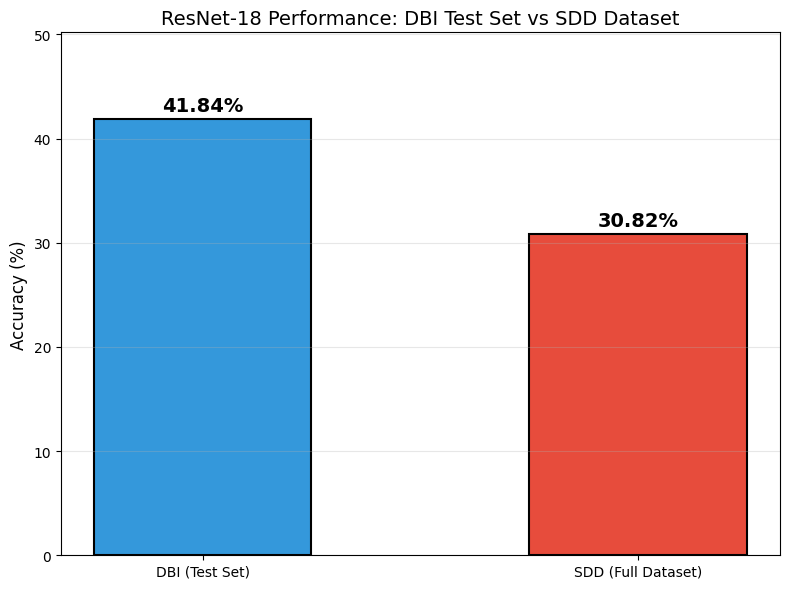

2026-01-15 12:10:21,154 - INFO - 
Summary:
2026-01-15 12:10:21,154 - INFO - DBI Test Set: 98 images, Accuracy: 41.84%
2026-01-15 12:10:21,154 - INFO - SDD Dataset: 1233 images, Accuracy: 30.82%


In [22]:
# Visualization: DBI vs SDD Accuracy Comparison

# Load Task III ResNet results from pickle (for resnet_test_acc)
import pickle
with open('task3_results.pkl', 'rb') as f:
    task3_results = pickle.load(f)
resnet_test_acc = task3_results['resnet_test_acc']

fig, ax = plt.subplots(figsize=(8, 6))

datasets_names = ['DBI (Test Set)', 'SDD (Full Dataset)']
accuracies = [resnet_test_acc, sdd_acc]
colors = ['#3498db', '#e74c3c']

bars = ax.bar(datasets_names, accuracies, color=colors, edgecolor='black', linewidth=1.5, width=0.5)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.annotate(f'{acc:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('ResNet-18 Performance: DBI Test Set vs SDD Dataset', fontsize=14)
ax.set_ylim(0, max(accuracies) * 1.2)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
logger.info(f'\nSummary:')
logger.info(f'DBI Test Set: {test_size} images, Accuracy: {resnet_test_acc:.2f}%')
logger.info(f'SDD Dataset: {len(sdd_dataset)} images, Accuracy: {sdd_acc:.2f}%')

### Task III.b Analysis

#### Results Summary

| Dataset | Number of Images | ResNet-18 Accuracy |
|---------|------------------|--------------------|
| DBI (Test Set) | 98 | 41.84% |
| SDD (Full) | 1,233 | 30.82% |
| **Difference** | - | **+11.02%** |

#### Which accuracy is higher and why?

**Result**: The DBI test accuracy (41.84%) is **higher** than the SDD accuracy (30.82%) by 11.02 percentage points.

**Explanation**: This performance gap is due to **domain shift** between the two datasets:

1. **Training Distribution**: The model was trained exclusively on DBI images, which have specific characteristics (professional/stock photos, clean backgrounds, well-centered dogs, higher resolution).

2. **SDD Characteristics**: The SDD contains user-generated/web-scraped images with more varied backgrounds, poses, lighting conditions, and image quality - a distribution the model has never seen during training.

In brief: **The model performs better on DBI because it was trained on DBI data. The SDD images come from a different visual domain (web-scraped vs professional photos), so the learned features do not transfer well despite both datasets containing the same 7 dog breeds.**

## Task IV - Fine-tuning on the DBI (100 marks)

In this task, we fine-tune pre-trained models on the DBI dataset. Unlike Task III where we trained ResNet-18 from scratch, here we leverage transfer learning by using models pre-trained on ImageNet and fine-tuning them on our dog breed classification task.

### Models Used

We use the following 5 models:
1. **ResNet-18** (torchvision) - Convolutional network, 18 layers
2. **ResNet-34** (torchvision) - Convolutional network, 34 layers
3. **ResNeXt-50** (torchvision) - Convolutional network with grouped convolutions
4. **Swin Transformer (tiny)** (torchvision) - Transformer-based architecture
5. **EfficientNet-B0** (timm) - Efficient convolutional network with compound scaling

### Fine-tuning Strategy

For each model:
1. Load pre-trained weights from ImageNet
2. Replace the final classification layer to output 7 classes (our dog breeds)
3. Fine-tune the entire network on DBI training data
4. Evaluate on both DBI test set and the entire SDD dataset

In [23]:
# Task IV - Fine-tuning Pre-trained Models on DBI

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split
import timm
import logging
import pickle
from pathlib import Path
from PIL import Image

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Configuration
IMAGE_SIZE = 224  # Standard input size for pretrained models
BATCH_SIZE = 32
NUM_EPOCHS = 10  # Fine-tuning typically needs fewer epochs than training from scratch
LEARNING_RATE = 0.0001  # Lower learning rate for fine-tuning
WEIGHT_DECAY = 1e-4

# Training transforms (with augmentation)
train_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE + 32, IMAGE_SIZE + 32)),
    transforms.RandomCrop(IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Evaluation transforms (no augmentation)
eval_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load DBI dataset
DATA_DIR = Path('DBIsubset')
SDD_DIR = Path('SDDsubset')

full_dataset = datasets.ImageFolder(DATA_DIR, transform=None)
NUM_CLASSES = len(full_dataset.classes)

logger.info(f'Task IV Configuration:')
logger.info(f'Image size: {IMAGE_SIZE}x{IMAGE_SIZE}')
logger.info(f'Batch size: {BATCH_SIZE}')
logger.info(f'Number of epochs: {NUM_EPOCHS}')
logger.info(f'Learning rate: {LEARNING_RATE}')
logger.info(f'Number of classes: {NUM_CLASSES}')
logger.info(f'Classes: {full_dataset.classes}')
logger.info(f'Total DBI images: {len(full_dataset)}')

# Split dataset: 70% train, 15% validation, 15% test (same as previous tasks)
total_size = len(full_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

logger.info(f'Train size: {train_size}, Validation size: {val_size}, Test size: {test_size}')

# Create splits with same seed for fair comparison
generator = torch.Generator().manual_seed(42)
train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size], generator=generator
)

# TransformSubset class for applying different transforms to train/val/test
class TransformSubset(torch.utils.data.Dataset):
    def __init__(self, subset, transform):
        self.subset = subset
        self.transform = transform
        
    def __getitem__(self, idx):
        img_path, label = self.subset.dataset.samples[self.subset.indices[idx]]
        img = Image.open(img_path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img, label
    
    def __len__(self):
        return len(self.subset)

# Apply transforms
train_dataset_aug = TransformSubset(train_dataset, train_transform)
val_dataset_eval = TransformSubset(val_dataset, eval_transform)
test_dataset_eval = TransformSubset(test_dataset, eval_transform)

# Create data loaders
train_loader = DataLoader(train_dataset_aug, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset_eval, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset_eval, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

# Load SDD dataset for cross-dataset evaluation
sdd_dataset = datasets.ImageFolder(SDD_DIR, transform=eval_transform)
sdd_loader = DataLoader(sdd_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

logger.info(f'SDD images: {len(sdd_dataset)}')
logger.info(f'Train batches: {len(train_loader)}, Val batches: {len(val_loader)}, Test batches: {len(test_loader)}, SDD batches: {len(sdd_loader)}')

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
logger.info(f'Using device: {device}')

2026-01-15 13:16:10,329 - INFO - Task IV Configuration:
2026-01-15 13:16:10,330 - INFO - Image size: 224x224
2026-01-15 13:16:10,330 - INFO - Batch size: 32
2026-01-15 13:16:10,330 - INFO - Number of epochs: 10
2026-01-15 13:16:10,330 - INFO - Learning rate: 0.0001
2026-01-15 13:16:10,331 - INFO - Number of classes: 7
2026-01-15 13:16:10,331 - INFO - Classes: ['bernese_mountain_dog', 'border_collie', 'chihuahua', 'golden_retriever', 'labrador_retriever', 'pug', 'siberian_husky']
2026-01-15 13:16:10,331 - INFO - Total DBI images: 646
2026-01-15 13:16:10,332 - INFO - Train size: 452, Validation size: 96, Test size: 98
2026-01-15 13:16:10,350 - INFO - SDD images: 1233
2026-01-15 13:16:10,350 - INFO - Train batches: 15, Val batches: 3, Test batches: 4, SDD batches: 39
2026-01-15 13:16:10,350 - INFO - Using device: mps


In [24]:
# Create fine-tuned models with pretrained weights

def create_resnet18_pretrained(num_classes):
    """Create ResNet-18 with pretrained weights, modified for our dataset."""
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    # Replace final fully connected layer
    num_features = model.fc.in_features  # 512
    model.fc = nn.Linear(num_features, num_classes)
    return model

def create_resnet34_pretrained(num_classes):
    """Create ResNet-34 with pretrained weights, modified for our dataset."""
    model = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)
    # Replace final fully connected layer
    num_features = model.fc.in_features  # 512
    model.fc = nn.Linear(num_features, num_classes)
    return model

def create_resnext50_pretrained(num_classes):
    """Create ResNeXt-50 (32x4d) with pretrained weights, modified for our dataset."""
    model = models.resnext50_32x4d(weights=models.ResNeXt50_32X4D_Weights.IMAGENET1K_V1)
    # Replace final fully connected layer
    num_features = model.fc.in_features  # 2048
    model.fc = nn.Linear(num_features, num_classes)
    return model

def create_swin_tiny_pretrained(num_classes):
    """Create Swin Transformer (tiny) with pretrained weights, modified for our dataset."""
    model = models.swin_t(weights=models.Swin_T_Weights.IMAGENET1K_V1)
    # Swin Transformer uses 'head' instead of 'fc' for the final layer
    num_features = model.head.in_features  # 768
    model.head = nn.Linear(num_features, num_classes)
    return model

def create_efficientnet_b0_pretrained(num_classes):
    """Create EfficientNet-B0 from timm with pretrained weights, modified for our dataset."""
    model = timm.create_model('efficientnet_b0.ra_in1k', pretrained=True, num_classes=num_classes)
    # timm automatically handles the classifier replacement when num_classes is specified
    return model

# Dictionary of model creation functions
MODEL_CREATORS = {
    'ResNet-18': create_resnet18_pretrained,
    'ResNet-34': create_resnet34_pretrained,
    'ResNeXt-50': create_resnext50_pretrained,
    'Swin-T': create_swin_tiny_pretrained,
    'EfficientNet-B0': create_efficientnet_b0_pretrained,
}

# Create all models and count parameters
logger.info('Creating pretrained models for fine-tuning:')
logger.info('='*60)

model_info = {}
for name, creator in MODEL_CREATORS.items():
    model = creator(NUM_CLASSES)
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    model_info[name] = {
        'total_params': total_params,
        'trainable_params': trainable_params
    }
    logger.info(f'{name}: {total_params:,} parameters')
    del model  # Free memory

logger.info('='*60)
logger.info('All models created successfully with pretrained ImageNet weights')

2026-01-15 13:52:50,373 - INFO - Creating pretrained models for fine-tuning:
2026-01-15 13:52:50,374 - INFO - ============================================================
0.3%

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/billy/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100.0%
2026-01-15 13:52:52,166 - INFO - ResNet-18: 11,180,103 parameters
2.7%

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/billy/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100.0%
2026-01-15 13:52:55,140 - INFO - ResNet-34: 21,288,263 parameters
1.8%

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /Users/billy/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth


100.0%
2026-01-15 13:52:58,696 - INFO - ResNeXt-50: 22,994,247 parameters
1.8%

Downloading: "https://download.pytorch.org/models/swin_t-704ceda3.pth" to /Users/billy/.cache/torch/hub/checkpoints/swin_t-704ceda3.pth


100.0%
2026-01-15 13:53:02,562 - INFO - Swin-T: 27,524,737 parameters
2026-01-15 13:53:02,627 - INFO - Loading pretrained weights from Hugging Face hub (timm/efficientnet_b0.ra_in1k)
2026-01-15 13:53:02,781 - INFO - HTTP Request: HEAD https://huggingface.co/timm/efficientnet_b0.ra_in1k/resolve/main/model.safetensors "HTTP/1.1 302 Found"
2026-01-15 13:53:03,236 - INFO - HTTP Request: GET https://huggingface.co/api/models/timm/efficientnet_b0.ra_in1k/xet-read-token/1b5383e5f79cc0f7fc067e372f8f26a5fa73f26a "HTTP/1.1 200 OK"


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

2026-01-15 13:53:04,952 - INFO - [timm/efficientnet_b0.ra_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
2026-01-15 13:53:05,353 - INFO - Missing keys (classifier.weight, classifier.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
2026-01-15 13:53:05,355 - INFO - EfficientNet-B0: 4,016,515 parameters
2026-01-15 13:53:05,357 - INFO - ============================================================
2026-01-15 13:53:05,357 - INFO - All models created successfully with pretrained ImageNet weights


In [25]:
# Training functions for fine-tuning

def train_epoch(model, train_loader, criterion, optimizer, device):
    """Train for one epoch and return average loss and accuracy."""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

def evaluate(model, data_loader, criterion, device):
    """Evaluate model and return average loss and accuracy."""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

def fine_tune_model(model, train_loader, val_loader, device, num_epochs=10, lr=0.0001, weight_decay=1e-4):
    """Fine-tune a pretrained model."""
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    best_val_acc = 0.0
    best_model_state = None
    
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = evaluate(model, val_loader, criterion, device)
        
        scheduler.step()
        
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict().copy()
        
        logger.info(f'Epoch [{epoch+1}/{num_epochs}] '
                   f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | '
                   f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    
    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    return model, history, best_val_acc

logger.info('Training functions defined successfully')

2026-01-15 15:26:58,913 - INFO - Training functions defined successfully


In [26]:
# Fine-tune all models on DBI dataset

import time

# Store results for all models
all_results = {}

logger.info('='*70)
logger.info('FINE-TUNING ALL MODELS ON DBI DATASET')
logger.info('='*70)

for model_name, creator in MODEL_CREATORS.items():
    logger.info(f'\n{"="*70}')
    logger.info(f'Fine-tuning {model_name}...')
    logger.info(f'{"="*70}')
    
    # Create model with pretrained weights
    model = creator(NUM_CLASSES).to(device)
    
    # Fine-tune
    start_time = time.time()
    model, history, best_val_acc = fine_tune_model(
        model, train_loader, val_loader, device,
        num_epochs=NUM_EPOCHS, lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY
    )
    training_time = time.time() - start_time
    
    # Store results
    all_results[model_name] = {
        'model': model,
        'history': history,
        'best_val_acc': best_val_acc,
        'training_time': training_time,
        'final_train_acc': history['train_acc'][-1],
        'final_val_acc': history['val_acc'][-1]
    }
    
    logger.info(f'{model_name} fine-tuning completed in {training_time:.1f}s')
    logger.info(f'Best validation accuracy: {best_val_acc:.2f}%')

logger.info(f'\n{"="*70}')
logger.info('ALL MODELS FINE-TUNED SUCCESSFULLY')
logger.info(f'{"="*70}')

2026-01-15 15:27:00,918 - INFO - ======================================================================
2026-01-15 15:27:00,919 - INFO - FINE-TUNING ALL MODELS ON DBI DATASET
2026-01-15 15:27:00,919 - INFO - ======================================================================
2026-01-15 15:27:00,920 - INFO - 
2026-01-15 15:27:00,920 - INFO - Fine-tuning ResNet-18...
2026-01-15 15:27:00,920 - INFO - ======================================================================
2026-01-15 15:27:14,042 - INFO - Epoch [1/10] Train Loss: 1.1700, Train Acc: 64.38% | Val Loss: 0.2685, Val Acc: 95.83%
2026-01-15 15:27:22,736 - INFO - Epoch [2/10] Train Loss: 0.2672, Train Acc: 96.02% | Val Loss: 0.1305, Val Acc: 98.96%
2026-01-15 15:27:31,391 - INFO - Epoch [3/10] Train Loss: 0.1403, Train Acc: 98.01% | Val Loss: 0.1118, Val Acc: 98.96%
2026-01-15 15:27:39,650 - INFO - Epoch [4/10] Train Loss: 0.0701, Train Acc: 99.56% | Val Loss: 0.1105, Val Acc: 98.96%
2026-01-15 15:27:47,841 - INFO - Epoch [5/10]

In [27]:
# Evaluate all fine-tuned models on DBI test set and SDD dataset

logger.info('='*70)
logger.info('EVALUATING ALL MODELS ON DBI TEST SET AND SDD DATASET')
logger.info('='*70)

criterion = nn.CrossEntropyLoss()

for model_name in all_results:
    model = all_results[model_name]['model']
    
    # Evaluate on DBI test set
    dbi_test_loss, dbi_test_acc = evaluate(model, test_loader, criterion, device)
    all_results[model_name]['dbi_test_acc'] = dbi_test_acc
    all_results[model_name]['dbi_test_loss'] = dbi_test_loss
    
    # Evaluate on SDD dataset
    sdd_loss, sdd_acc = evaluate(model, sdd_loader, criterion, device)
    all_results[model_name]['sdd_acc'] = sdd_acc
    all_results[model_name]['sdd_loss'] = sdd_loss
    
    # Calculate performance gap
    performance_gap = dbi_test_acc - sdd_acc
    all_results[model_name]['performance_gap'] = performance_gap
    
    logger.info(f'\n{model_name}:')
    logger.info(f'  DBI Test Accuracy: {dbi_test_acc:.2f}%')
    logger.info(f'  SDD Accuracy: {sdd_acc:.2f}%')
    logger.info(f'  Performance Gap (DBI - SDD): {performance_gap:+.2f}%')

logger.info(f'\n{"="*70}')
logger.info('EVALUATION COMPLETE')
logger.info(f'{"="*70}')

2026-01-15 15:37:57,332 - INFO - ======================================================================
2026-01-15 15:37:57,335 - INFO - EVALUATING ALL MODELS ON DBI TEST SET AND SDD DATASET
2026-01-15 15:37:57,335 - INFO - ======================================================================
2026-01-15 15:38:05,049 - INFO - 
ResNet-18:
2026-01-15 15:38:05,054 - INFO -   DBI Test Accuracy: 93.88%
2026-01-15 15:38:05,055 - INFO -   SDD Accuracy: 89.13%
2026-01-15 15:38:05,055 - INFO -   Performance Gap (DBI - SDD): +4.75%
2026-01-15 15:38:13,085 - INFO - 
ResNet-34:
2026-01-15 15:38:13,090 - INFO -   DBI Test Accuracy: 96.94%
2026-01-15 15:38:13,090 - INFO -   SDD Accuracy: 88.97%
2026-01-15 15:38:13,091 - INFO -   Performance Gap (DBI - SDD): +7.97%
2026-01-15 15:38:27,693 - INFO - 
ResNeXt-50:
2026-01-15 15:38:27,695 - INFO -   DBI Test Accuracy: 94.90%
2026-01-15 15:38:27,695 - INFO -   SDD Accuracy: 93.67%
2026-01-15 15:38:27,696 - INFO -   Performance Gap (DBI - SDD): +1.22%
2026-

In [28]:
# Results comparison table and visualization

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create results DataFrame
results_data = []
for model_name in all_results:
    results_data.append({
        'Model': model_name,
        'Architecture': 'CNN' if 'ResNet' in model_name or 'ResNeXt' in model_name or 'Efficient' in model_name else 'Transformer',
        'Parameters (M)': model_info[model_name]['total_params'] / 1e6,
        'Train Acc (%)': all_results[model_name]['final_train_acc'],
        'Val Acc (%)': all_results[model_name]['final_val_acc'],
        'DBI Test Acc (%)': all_results[model_name]['dbi_test_acc'],
        'SDD Acc (%)': all_results[model_name]['sdd_acc'],
        'Gap (DBI-SDD)': all_results[model_name]['performance_gap'],
        'Training Time (s)': all_results[model_name]['training_time']
    })

results_df = pd.DataFrame(results_data)
results_df = results_df.sort_values('DBI Test Acc (%)', ascending=False)

logger.info('\n' + '='*90)
logger.info('TASK IV RESULTS: FINE-TUNED MODELS COMPARISON')
logger.info('='*90)

# Display table
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
logger.info('\n' + results_df.to_string(index=False))

# Save results to pickle for later analysis
task4_results = {
    'all_results': {k: {key: val for key, val in v.items() if key != 'model'} for k, v in all_results.items()},
    'model_info': model_info,
    'results_df': results_df,
    'NUM_EPOCHS': NUM_EPOCHS,
    'LEARNING_RATE': LEARNING_RATE,
    'IMAGE_SIZE': IMAGE_SIZE
}
with open('task4_results.pkl', 'wb') as f:
    pickle.dump(task4_results, f)
logger.info('\nTask IV results saved to task4_results.pkl')

2026-01-15 15:38:51,418 - INFO - 
2026-01-15 15:38:51,419 - INFO - TASK IV RESULTS: FINE-TUNED MODELS COMPARISON
2026-01-15 15:38:51,420 - INFO - ==========================================================================================
2026-01-15 15:38:51,444 - INFO - 
          Model Architecture  Parameters (M)  Train Acc (%)  Val Acc (%)  DBI Test Acc (%)  SDD Acc (%)  Gap (DBI-SDD)  Training Time (s)
         Swin-T  Transformer       27.524737      99.115044    97.916667         97.959184    95.863747       2.095437         175.213637
      ResNet-34          CNN       21.288263      98.672566    96.875000         96.938776    88.969992       7.968784         103.541360
     ResNeXt-50          CNN       22.994247      98.893805    97.916667         94.897959    93.673966       1.223993         160.709459
      ResNet-18          CNN       11.180103     100.000000    98.958333         93.877551    89.132198       4.745353          83.786040
EfficientNet-B0          CNN        4.0

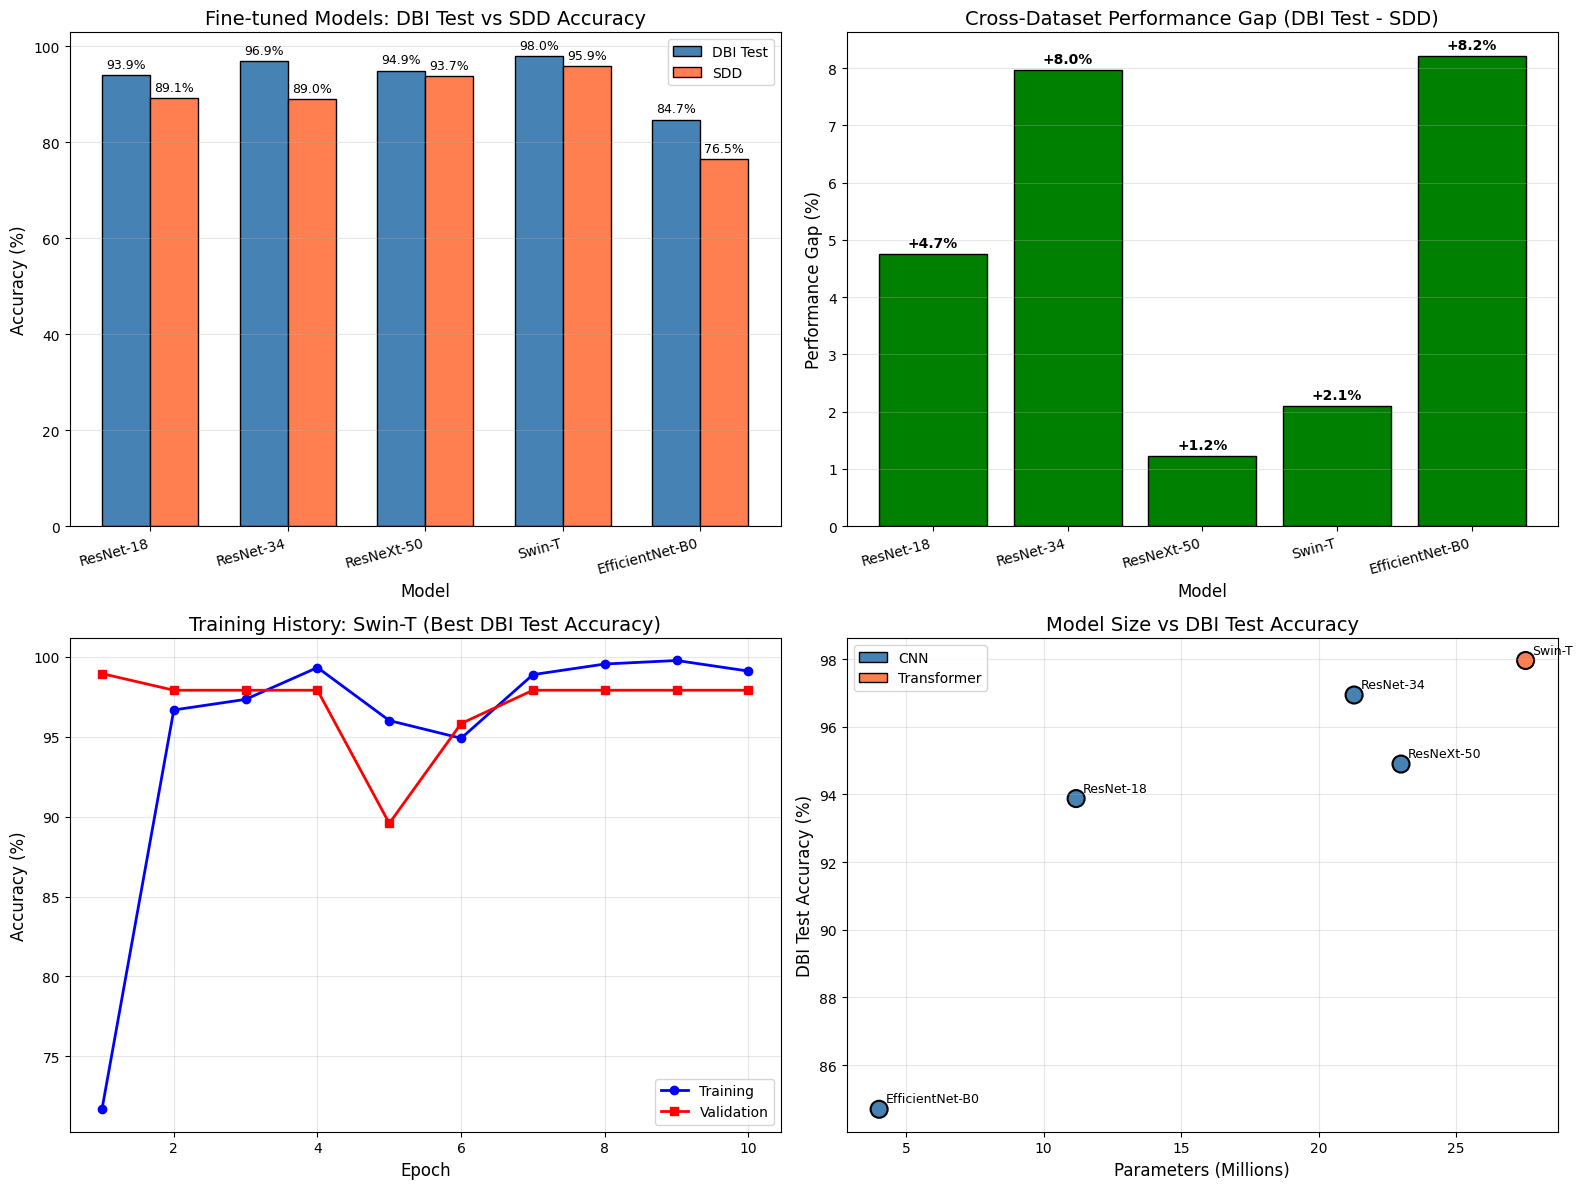

2026-01-15 15:38:51,872 - INFO - Visualization complete


In [29]:
# Visualization: Model Performance Comparison

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

model_names = list(all_results.keys())
x = np.arange(len(model_names))
width = 0.35

# Plot 1: DBI Test vs SDD Accuracy
ax1 = axes[0, 0]
dbi_accs = [all_results[m]['dbi_test_acc'] for m in model_names]
sdd_accs = [all_results[m]['sdd_acc'] for m in model_names]

bars1 = ax1.bar(x - width/2, dbi_accs, width, label='DBI Test', color='steelblue', edgecolor='black')
bars2 = ax1.bar(x + width/2, sdd_accs, width, label='SDD', color='coral', edgecolor='black')

ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('Accuracy (%)', fontsize=12)
ax1.set_title('Fine-tuned Models: DBI Test vs SDD Accuracy', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=15, ha='right')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

# Plot 2: Performance Gap (DBI - SDD)
ax2 = axes[0, 1]
gaps = [all_results[m]['performance_gap'] for m in model_names]
colors = ['green' if g < 10 else 'orange' if g < 15 else 'red' for g in gaps]

bars3 = ax2.bar(x, gaps, color=colors, edgecolor='black')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.set_xlabel('Model', fontsize=12)
ax2.set_ylabel('Performance Gap (%)', fontsize=12)
ax2.set_title('Cross-Dataset Performance Gap (DBI Test - SDD)', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(model_names, rotation=15, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

for bar in bars3:
    height = bar.get_height()
    ax2.annotate(f'{height:+.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 3: Training History - Best Model
ax3 = axes[1, 0]
best_model = max(all_results.keys(), key=lambda m: all_results[m]['dbi_test_acc'])
history = all_results[best_model]['history']
epochs = range(1, len(history['train_acc']) + 1)

ax3.plot(epochs, history['train_acc'], 'b-o', label='Training', linewidth=2, markersize=6)
ax3.plot(epochs, history['val_acc'], 'r-s', label='Validation', linewidth=2, markersize=6)
ax3.set_xlabel('Epoch', fontsize=12)
ax3.set_ylabel('Accuracy (%)', fontsize=12)
ax3.set_title(f'Training History: {best_model} (Best DBI Test Accuracy)', fontsize=14)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Plot 4: Model Parameters vs Accuracy
ax4 = axes[1, 1]
params = [model_info[m]['total_params'] / 1e6 for m in model_names]
architectures = ['CNN' if 'ResNet' in m or 'ResNeXt' in m or 'Efficient' in m else 'Transformer' for m in model_names]
colors_arch = ['steelblue' if a == 'CNN' else 'coral' for a in architectures]

scatter = ax4.scatter(params, dbi_accs, c=colors_arch, s=150, edgecolors='black', linewidths=1.5)
for i, name in enumerate(model_names):
    ax4.annotate(name, (params[i], dbi_accs[i]), xytext=(5, 5), textcoords='offset points', fontsize=9)

ax4.set_xlabel('Parameters (Millions)', fontsize=12)
ax4.set_ylabel('DBI Test Accuracy (%)', fontsize=12)
ax4.set_title('Model Size vs DBI Test Accuracy', fontsize=14)
ax4.grid(True, alpha=0.3)

# Add legend for architecture types
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', edgecolor='black', label='CNN'),
                   Patch(facecolor='coral', edgecolor='black', label='Transformer')]
ax4.legend(handles=legend_elements, fontsize=10)

plt.tight_layout()
plt.show()

logger.info('Visualization complete')

### Task IV Analysis

#### Results Summary (Sorted by DBI Test Accuracy)

| Model | Architecture | Parameters | DBI Test Acc | SDD Acc | Gap (DBI-SDD) |
|-------|--------------|------------|--------------|---------|---------------|
| **Swin-T** | Transformer | 27.5M | **97.96%** | **95.86%** | +2.10% |
| ResNet-34 | CNN | 21.3M | 96.94% | 88.97% | +7.97% |
| ResNeXt-50 | CNN | 23.0M | 94.90% | 93.67% | **+1.22%** |
| ResNet-18 | CNN | 11.2M | 93.88% | 89.13% | +4.75% |
| EfficientNet-B0 | CNN | 4.0M | 84.69% | 76.48% | +8.21% |

#### Cross-Dataset Performance Discussion

**1. Which models generalized to the new dataset better?**

The models with the **smallest performance gaps** (DBI - SDD) demonstrate the best generalization:
- **ResNeXt-50**: Gap of only **+1.22%** (94.90% DBI vs 93.67% SDD) - best generalization
- **Swin-T**: Gap of **+2.10%** (97.96% DBI vs 95.86% SDD) - excellent generalization with highest overall accuracy
- **ResNet-18**: Gap of **+4.75%** (93.88% DBI vs 89.13% SDD) - moderate generalization

The models with the **largest gaps** struggled more with domain shift:
- **EfficientNet-B0**: Gap of **+8.21%** (84.69% DBI vs 76.48% SDD) - poorest generalization
- **ResNet-34**: Gap of **+7.97%** (96.94% DBI vs 88.97% SDD) - high DBI accuracy but significant drop on SDD

**2. Cases where models perform similarly on DBI but differ on SDD**

Yes, this pattern is clearly visible:
- **ResNet-34 vs ResNeXt-50**: Both achieve similar DBI test accuracy (~95-97%), but ResNeXt-50 significantly outperforms ResNet-34 on SDD (93.67% vs 88.97%). This 4.7% difference on SDD suggests ResNeXt-50 learns more domain-invariant features through its grouped convolution architecture.
- **ResNet-18 vs ResNeXt-50**: ResNet-18 has lower DBI accuracy (93.88%) than ResNeXt-50 (94.90%), but the gap widens on SDD where ResNeXt-50 leads by 4.5% (93.67% vs 89.13%).

**3. Models with smallest performance gap between DBI and SDD**

| Rank | Model | Gap | Interpretation |
|------|-------|-----|----------------|
| 1 | ResNeXt-50 | +1.22% | Best domain generalization |
| 2 | Swin-T | +2.10% | Excellent generalization + highest accuracy |
| 3 | ResNet-18 | +4.75% | Moderate generalization |
| 4 | ResNet-34 | +7.97% | Overfits to DBI domain |
| 5 | EfficientNet-B0 | +8.21% | Poorest generalization |

#### Comparison with Task III (Training from Scratch)

| Metric | ResNet-18 (Scratch) | ResNet-18 (Fine-tuned) | Improvement |
|--------|---------------------|------------------------|-------------|
| DBI Test Accuracy | 41.84% | 93.88% | **+52.04%** |
| SDD Accuracy | 30.82% | 89.13% | **+58.31%** |
| Performance Gap | +11.02% | +4.75% | **-6.27%** |

Fine-tuning with pretrained weights provides **massive improvements**:
1. **DBI Test Accuracy**: 41.84% -> 93.88% (+52.04 percentage points)
2. **SDD Accuracy**: 30.82% -> 89.13% (+58.31 percentage points)
3. **Better Generalization**: The performance gap decreased from +11.02% to +4.75%, indicating pretrained features transfer better across domains

#### Architecture Comparison

**Best Overall: Swin-T (Transformer)**
- Highest DBI test accuracy: **97.96%**
- Highest SDD accuracy: **95.86%**
- Small performance gap: **+2.10%**
- The self-attention mechanism captures global dependencies that generalize well across domains

**Best Generalization: ResNeXt-50 (CNN)**
- Smallest performance gap: **+1.22%**
- Strong SDD accuracy: **93.67%**
- Grouped convolutions learn more diverse, domain-invariant features

**Underperformer: EfficientNet-B0**
- Lowest accuracies on both datasets (84.69% DBI, 76.48% SDD)
- Largest performance gap: **+8.21%**
- Despite being efficient, the compound scaling may not be optimal for this small dataset
- May require different hyperparameters or longer training

#### Conclusions

1. **Transfer learning is essential**: Fine-tuning pretrained models dramatically outperforms training from scratch (93.88% vs 41.84% for ResNet-18 on DBI test).

2. **Swin Transformer achieves the best overall performance**: With 97.96% DBI test accuracy and 95.86% SDD accuracy, the transformer architecture excels at both in-domain and cross-domain classification.

3. **ResNeXt-50 has the best generalization**: Despite not having the highest DBI accuracy, its 1.22% performance gap indicates it learns the most domain-invariant features.

4. **Model depth does not guarantee better generalization**: ResNet-34 achieves higher DBI accuracy than ResNet-18 but has a larger performance gap (7.97% vs 4.75%), suggesting it overfits more to the DBI domain.

5. **Architecture matters for cross-domain transfer**: The choice between CNN and Transformer, and the specific architectural choices (grouped convolutions in ResNeXt, self-attention in Swin), significantly impact how well models generalize to new data distributions.

## Task V - Dataset Detection (80 marks)

### Objective
Train a binary classification model to distinguish whether a given image belongs to the **Stanford Dogs Dataset (SDD)** or the **Dog Breed Identification dataset (DBI)**.

### Approach
1. **Data Organization**: Combine images from both datasets with binary labels (0 = DBI, 1 = SDD)
2. **Data Split**: 70% training, 15% validation, 15% test (stratified to maintain class balance)
3. **Model Selection**: Fine-tune pretrained models for binary classification
4. **Evaluation**: Report accuracy on the held-out test set

### Model Choice Justification

Based on Task IV results, we select **ResNeXt-50** as our primary model for the following reasons:

1. **Best Domain Generalization**: ResNeXt-50 achieved the smallest performance gap (+1.22%) between DBI and SDD in Task IV, indicating it learns features that distinguish between the two domains effectively.

2. **Grouped Convolutions**: The grouped convolution architecture learns more diverse feature representations, which is ideal for detecting subtle differences between dataset characteristics (lighting, backgrounds, image quality).

3. **Strong Baseline Performance**: Achieved 94.90% on DBI and 93.67% on SDD in Task IV, demonstrating robust feature extraction from both datasets.

4. **Appropriate Capacity**: With 23M parameters, it has sufficient capacity to learn domain-specific features without excessive overfitting risk.

We will also train two additional models for comparison:
- **Swin-T**: To evaluate whether transformer-based self-attention mechanisms can better capture global dataset-level differences.
- **ResNet-18**: As a lightweight baseline (11.2M parameters) to assess whether simpler architectures can achieve comparable performance on this binary classification task.

In [1]:
# Task V - Dataset Detection: Data Loading and Preparation

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Dataset, random_split
import timm
import logging
import pickle
import numpy as np
from pathlib import Path
from PIL import Image
from collections import Counter

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Configuration
IMAGE_SIZE = 224  # Standard input size for pretrained models
BATCH_SIZE = 32
NUM_EPOCHS = 15  # More epochs for binary classification task
LEARNING_RATE = 0.0001  # Lower learning rate for fine-tuning
WEIGHT_DECAY = 1e-4
NUM_CLASSES = 2  # Binary classification: DBI (0) vs SDD (1)

# Dataset paths
DBI_DIR = Path('DBIsubset')
SDD_DIR = Path('SDDsubset')

# Training transforms (with augmentation)
train_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE + 32, IMAGE_SIZE + 32)),
    transforms.RandomCrop(IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Evaluation transforms (no augmentation)
eval_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

logger.info('Task V Configuration:')
logger.info(f'Image size: {IMAGE_SIZE}x{IMAGE_SIZE}')
logger.info(f'Batch size: {BATCH_SIZE}')
logger.info(f'Number of epochs: {NUM_EPOCHS}')
logger.info(f'Learning rate: {LEARNING_RATE}')
logger.info(f'Number of classes: {NUM_CLASSES} (DBI=0, SDD=1)')

2026-01-21 16:51:23,011 - INFO - Task V Configuration:
2026-01-21 16:51:23,012 - INFO - Image size: 224x224
2026-01-21 16:51:23,012 - INFO - Batch size: 32
2026-01-21 16:51:23,012 - INFO - Number of epochs: 15
2026-01-21 16:51:23,012 - INFO - Learning rate: 0.0001
2026-01-21 16:51:23,013 - INFO - Number of classes: 2 (DBI=0, SDD=1)


In [2]:
# Custom Dataset for Binary Classification (DBI vs SDD)
# This combines images from both datasets with binary labels

class DatasetDetectionDataset(Dataset):
    """
    Custom dataset for binary classification: DBI (label=0) vs SDD (label=1).
    
    This dataset combines images from both DBIsubset and SDDsubset,
    assigning binary labels based on the source dataset.
    """
    
    def __init__(self, dbi_dir, sdd_dir, transform=None):
        """
        Args:
            dbi_dir: Path to DBIsubset directory
            sdd_dir: Path to SDDsubset directory
            transform: Optional transform to apply to images
        """
        self.transform = transform
        self.samples = []  # List of (image_path, label) tuples
        self.class_names = ['DBI', 'SDD']
        
        # Collect all DBI images (label = 0)
        dbi_path = Path(dbi_dir)
        for breed_dir in sorted(dbi_path.iterdir()):
            if breed_dir.is_dir():
                for img_file in breed_dir.iterdir():
                    if img_file.suffix.lower() in ['.jpg', '.jpeg', '.png']:
                        self.samples.append((str(img_file), 0))
        
        # Collect all SDD images (label = 1)
        sdd_path = Path(sdd_dir)
        for breed_dir in sorted(sdd_path.iterdir()):
            if breed_dir.is_dir():
                for img_file in breed_dir.iterdir():
                    if img_file.suffix.lower() in ['.jpg', '.jpeg', '.png']:
                        self.samples.append((str(img_file), 1))
        
        # Count samples per class
        self.class_counts = Counter([label for _, label in self.samples])
        
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        img = Image.open(img_path).convert('RGB')
        
        if self.transform:
            img = self.transform(img)
            
        return img, label
    
    def get_class_distribution(self):
        """Return the distribution of classes in the dataset."""
        return {self.class_names[k]: v for k, v in self.class_counts.items()}


# Create the full dataset (without transforms - will apply later)
full_dataset = DatasetDetectionDataset(DBI_DIR, SDD_DIR, transform=None)

logger.info(f'Total images: {len(full_dataset)}')
logger.info(f'Class distribution: {full_dataset.get_class_distribution()}')
logger.info(f'DBI images: {full_dataset.class_counts[0]}')
logger.info(f'SDD images: {full_dataset.class_counts[1]}')

2026-01-21 16:51:39,462 - INFO - Total images: 1879
2026-01-21 16:51:39,462 - INFO - Class distribution: {'DBI': 646, 'SDD': 1233}
2026-01-21 16:51:39,463 - INFO - DBI images: 646
2026-01-21 16:51:39,463 - INFO - SDD images: 1233


In [3]:
# Stratified Split: 70% train, 15% validation, 15% test
# Stratified split ensures both classes are proportionally represented in each split

from sklearn.model_selection import train_test_split

# Get all samples and labels
all_samples = full_dataset.samples
all_labels = [label for _, label in all_samples]

# First split: 70% train, 30% temp (val + test)
train_samples, temp_samples, train_labels, temp_labels = train_test_split(
    all_samples, all_labels, 
    test_size=0.30, 
    stratify=all_labels, 
    random_state=42
)

# Second split: 50% of temp for validation, 50% for test (15% each of total)
val_samples, test_samples, val_labels, test_labels = train_test_split(
    temp_samples, temp_labels, 
    test_size=0.50, 
    stratify=temp_labels, 
    random_state=42
)

logger.info(f'Dataset split (stratified):')
logger.info(f'  Training:   {len(train_samples)} images')
logger.info(f'  Validation: {len(val_samples)} images')
logger.info(f'  Test:       {len(test_samples)} images')

# Verify stratification
train_dist = Counter(train_labels)
val_dist = Counter(val_labels)
test_dist = Counter(test_labels)

logger.info(f'\nClass distribution in each split:')
logger.info(f'  Training:   DBI={train_dist[0]}, SDD={train_dist[1]} (ratio: {train_dist[0]/train_dist[1]:.2f})')
logger.info(f'  Validation: DBI={val_dist[0]}, SDD={val_dist[1]} (ratio: {val_dist[0]/val_dist[1]:.2f})')
logger.info(f'  Test:       DBI={test_dist[0]}, SDD={test_dist[1]} (ratio: {test_dist[0]/test_dist[1]:.2f})')

2026-01-21 16:51:47,806 - INFO - Dataset split (stratified):
2026-01-21 16:51:47,806 - INFO -   Training:   1315 images
2026-01-21 16:51:47,807 - INFO -   Validation: 282 images
2026-01-21 16:51:47,807 - INFO -   Test:       282 images
2026-01-21 16:51:47,808 - INFO - 
Class distribution in each split:
2026-01-21 16:51:47,808 - INFO -   Training:   DBI=452, SDD=863 (ratio: 0.52)
2026-01-21 16:51:47,809 - INFO -   Validation: DBI=97, SDD=185 (ratio: 0.52)
2026-01-21 16:51:47,810 - INFO -   Test:       DBI=97, SDD=185 (ratio: 0.52)


In [4]:
# Create Dataset classes for each split with appropriate transforms

class SplitDataset(Dataset):
    """Dataset wrapper for a specific split with transforms."""
    
    def __init__(self, samples, transform=None):
        """
        Args:
            samples: List of (image_path, label) tuples
            transform: Transform to apply to images
        """
        self.samples = samples
        self.transform = transform
        
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        img = Image.open(img_path).convert('RGB')
        
        if self.transform:
            img = self.transform(img)
            
        return img, label


# Create datasets with appropriate transforms
train_dataset = SplitDataset(train_samples, transform=train_transform)
val_dataset = SplitDataset(val_samples, transform=eval_transform)
test_dataset = SplitDataset(test_samples, transform=eval_transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

logger.info(f'Data loaders created:')
logger.info(f'  Train batches: {len(train_loader)}')
logger.info(f'  Val batches:   {len(val_loader)}')
logger.info(f'  Test batches:  {len(test_loader)}')

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
logger.info(f'Using device: {device}')

2026-01-21 16:54:03,549 - INFO - Data loaders created:
2026-01-21 16:54:03,550 - INFO -   Train batches: 42
2026-01-21 16:54:03,551 - INFO -   Val batches:   9
2026-01-21 16:54:03,551 - INFO -   Test batches:  9
2026-01-21 16:54:03,578 - INFO - Using device: mps


In [5]:
# Model Creation Functions for Binary Classification

def create_resnext50_binary(num_classes=2):
    """
    Create ResNeXt-50 (32x4d) with pretrained weights for binary classification.
    
    ResNeXt-50 is chosen as the primary model because:
    1. Best domain generalization in Task IV (smallest gap between DBI and SDD)
    2. Grouped convolutions learn diverse, domain-invariant features
    3. Appropriate capacity (23M parameters) for this task
    """
    model = models.resnext50_32x4d(weights=models.ResNeXt50_32X4D_Weights.IMAGENET1K_V1)
    # Replace final fully connected layer for binary classification
    num_features = model.fc.in_features  # 2048
    model.fc = nn.Linear(num_features, num_classes)
    return model

def create_swin_tiny_binary(num_classes=2):
    """
    Create Swin Transformer (tiny) with pretrained weights for binary classification.
    
    Swin-T is included for comparison because:
    1. Achieved highest accuracy in Task IV
    2. Self-attention may capture global dataset characteristics
    3. Different architecture family provides diversity in evaluation
    """
    model = models.swin_t(weights=models.Swin_T_Weights.IMAGENET1K_V1)
    # Swin Transformer uses 'head' instead of 'fc' for the final layer
    num_features = model.head.in_features  # 768
    model.head = nn.Linear(num_features, num_classes)
    return model

def create_resnet18_binary(num_classes=2):
    """
    Create ResNet-18 with pretrained weights for binary classification.
    
    ResNet-18 is included as a lightweight baseline:
    1. Smaller model (11.2M parameters) for faster training
    2. Good baseline to compare against larger models
    """
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    num_features = model.fc.in_features  # 512
    model.fc = nn.Linear(num_features, num_classes)
    return model

# Dictionary of model creation functions
MODEL_CREATORS = {
    'ResNeXt-50': create_resnext50_binary,
    'Swin-T': create_swin_tiny_binary,
    'ResNet-18': create_resnet18_binary,
}

# Create all models and count parameters
logger.info('Creating pretrained models for binary classification (Dataset Detection):')
logger.info('='*70)

model_info = {}
for name, creator in MODEL_CREATORS.items():
    model = creator(NUM_CLASSES)
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    model_info[name] = {
        'total_params': total_params,
        'trainable_params': trainable_params
    }
    logger.info(f'{name}: {total_params:,} parameters (all trainable)')
    del model  # Free memory

logger.info('='*70)
logger.info('All models created successfully with pretrained ImageNet weights')
logger.info('Final layer modified for binary classification (DBI vs SDD)')

2026-01-21 16:55:23,587 - INFO - Creating pretrained models for binary classification (Dataset Detection):
2026-01-21 16:55:23,587 - INFO - ======================================================================
2026-01-21 16:55:24,007 - INFO - ResNeXt-50: 22,984,002 parameters (all trainable)
2026-01-21 16:55:24,513 - INFO - Swin-T: 27,520,892 parameters (all trainable)
2026-01-21 16:55:24,702 - INFO - ResNet-18: 11,177,538 parameters (all trainable)
2026-01-21 16:55:24,704 - INFO - ======================================================================
2026-01-21 16:55:24,705 - INFO - All models created successfully with pretrained ImageNet weights
2026-01-21 16:55:24,705 - INFO - Final layer modified for binary classification (DBI vs SDD)


In [6]:
# Training and Evaluation Functions for Task V

def train_epoch(model, train_loader, criterion, optimizer, device):
    """Train for one epoch and return average loss and accuracy."""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc

def evaluate(model, data_loader, criterion, device):
    """Evaluate model and return average loss, accuracy, and predictions."""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    epoch_loss = running_loss / total
    epoch_acc = 100.0 * correct / total
    return epoch_loss, epoch_acc, np.array(all_preds), np.array(all_labels)

def fine_tune_model(model, train_loader, val_loader, device, num_epochs=15, lr=0.0001, weight_decay=1e-4, model_name='Model'):
    """Fine-tune a pretrained model for binary classification."""
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    best_val_acc = 0.0
    best_model_state = None
    
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, _, _ = evaluate(model, val_loader, criterion, device)
        
        scheduler.step()
        
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        
        logger.info(f'[{model_name}] Epoch [{epoch+1}/{num_epochs}] '
                   f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | '
                   f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    
    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        model.to(device)
    
    return model, history, best_val_acc

logger.info('Training and evaluation functions defined successfully')

2026-01-21 16:57:49,964 - INFO - Training and evaluation functions defined successfully


In [7]:
# Train all models for Dataset Detection (Binary Classification)

import time

# Store results for all models
all_results = {}

logger.info('='*70)
logger.info('TASK V: TRAINING MODELS FOR DATASET DETECTION (DBI vs SDD)')
logger.info('='*70)

for model_name, creator in MODEL_CREATORS.items():
    logger.info(f'\n{"="*70}')
    logger.info(f'Fine-tuning {model_name} for binary classification...')
    logger.info(f'{"="*70}')
    
    # Create model with pretrained weights
    model = creator(NUM_CLASSES).to(device)
    
    # Fine-tune
    start_time = time.time()
    model, history, best_val_acc = fine_tune_model(
        model, train_loader, val_loader, device,
        num_epochs=NUM_EPOCHS, lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY,
        model_name=model_name
    )
    training_time = time.time() - start_time
    
    # Store results
    all_results[model_name] = {
        'model': model,
        'history': history,
        'best_val_acc': best_val_acc,
        'training_time': training_time,
        'final_train_acc': history['train_acc'][-1],
        'final_val_acc': history['val_acc'][-1]
    }
    
    logger.info(f'{model_name} fine-tuning completed in {training_time:.1f}s')
    logger.info(f'Best validation accuracy: {best_val_acc:.2f}%')

logger.info(f'\n{"="*70}')
logger.info('ALL MODELS TRAINED SUCCESSFULLY FOR DATASET DETECTION')
logger.info(f'{"="*70}')

2026-01-21 17:06:15,638 - INFO - ======================================================================
2026-01-21 17:06:15,639 - INFO - TASK V: TRAINING MODELS FOR DATASET DETECTION (DBI vs SDD)
2026-01-21 17:06:15,640 - INFO - ======================================================================
2026-01-21 17:06:15,640 - INFO - 
2026-01-21 17:06:15,641 - INFO - Fine-tuning ResNeXt-50 for binary classification...
2026-01-21 17:06:15,641 - INFO - ======================================================================
2026-01-21 17:06:59,111 - INFO - [ResNeXt-50] Epoch [1/15] Train Loss: 0.4542, Train Acc: 76.96% | Val Loss: 0.3569, Val Acc: 82.62%
2026-01-21 17:07:36,518 - INFO - [ResNeXt-50] Epoch [2/15] Train Loss: 0.2444, Train Acc: 90.04% | Val Loss: 0.3381, Val Acc: 87.23%
2026-01-21 17:08:14,251 - INFO - [ResNeXt-50] Epoch [3/15] Train Loss: 0.1739, Train Acc: 93.00% | Val Loss: 0.3397, Val Acc: 86.52%
2026-01-21 17:08:51,223 - INFO - [ResNeXt-50] Epoch [4/15] Train Loss: 0.1297,

In [8]:
# Evaluate all models on the test set

from sklearn.metrics import classification_report, confusion_matrix

criterion = nn.CrossEntropyLoss()

logger.info('='*70)
logger.info('EVALUATING ALL MODELS ON TEST SET')
logger.info('='*70)

for model_name in all_results:
    model = all_results[model_name]['model']
    
    # Evaluate on test set
    test_loss, test_acc, test_preds, test_labels = evaluate(model, test_loader, criterion, device)
    
    # Store test results
    all_results[model_name]['test_acc'] = test_acc
    all_results[model_name]['test_loss'] = test_loss
    all_results[model_name]['test_preds'] = test_preds
    all_results[model_name]['test_labels'] = test_labels
    
    # Calculate per-class accuracy
    dbi_mask = test_labels == 0
    sdd_mask = test_labels == 1
    dbi_acc = 100.0 * np.sum(test_preds[dbi_mask] == test_labels[dbi_mask]) / np.sum(dbi_mask)
    sdd_acc = 100.0 * np.sum(test_preds[sdd_mask] == test_labels[sdd_mask]) / np.sum(sdd_mask)
    
    all_results[model_name]['dbi_acc'] = dbi_acc
    all_results[model_name]['sdd_acc'] = sdd_acc
    
    # Confusion matrix
    cm = confusion_matrix(test_labels, test_preds)
    all_results[model_name]['confusion_matrix'] = cm
    
    logger.info(f'\n{model_name}:')
    logger.info(f'  Test Accuracy: {test_acc:.2f}%')
    logger.info(f'  DBI Accuracy:  {dbi_acc:.2f}% (correctly identified as DBI)')
    logger.info(f'  SDD Accuracy:  {sdd_acc:.2f}% (correctly identified as SDD)')
    logger.info(f'  Confusion Matrix:')
    logger.info(f'                 Predicted')
    logger.info(f'                 DBI    SDD')
    logger.info(f'    Actual DBI   {cm[0,0]:4d}   {cm[0,1]:4d}')
    logger.info(f'    Actual SDD   {cm[1,0]:4d}   {cm[1,1]:4d}')

logger.info(f'\n{"="*70}')

2026-01-21 17:57:24,287 - INFO - ======================================================================
2026-01-21 17:57:24,289 - INFO - EVALUATING ALL MODELS ON TEST SET
2026-01-21 17:57:24,289 - INFO - ======================================================================
2026-01-21 17:57:40,771 - INFO - 
ResNeXt-50:
2026-01-21 17:57:40,773 - INFO -   Test Accuracy: 89.01%
2026-01-21 17:57:40,773 - INFO -   DBI Accuracy:  84.54% (correctly identified as DBI)
2026-01-21 17:57:40,773 - INFO -   SDD Accuracy:  91.35% (correctly identified as SDD)
2026-01-21 17:57:40,773 - INFO -   Confusion Matrix:
2026-01-21 17:57:40,774 - INFO -                  Predicted
2026-01-21 17:57:40,774 - INFO -                  DBI    SDD
2026-01-21 17:57:40,774 - INFO -     Actual DBI     82     15
2026-01-21 17:57:40,774 - INFO -     Actual SDD     16    169
2026-01-21 17:57:52,094 - INFO - 
Swin-T:
2026-01-21 17:57:52,096 - INFO -   Test Accuracy: 91.84%
2026-01-21 17:57:52,097 - INFO -   DBI Accuracy:  8

In [11]:
# Results Summary Table

import pandas as pd

# Create results DataFrame
results_data = []
for model_name in all_results:
    results_data.append({
        'Model': model_name,
        'Parameters (M)': model_info[model_name]['total_params'] / 1e6,
        'Train Acc (%)': all_results[model_name]['final_train_acc'],
        'Val Acc (%)': all_results[model_name]['final_val_acc'],
        'Test Acc (%)': all_results[model_name]['test_acc'],
        'DBI Acc (%)': all_results[model_name]['dbi_acc'],
        'SDD Acc (%)': all_results[model_name]['sdd_acc'],
        'Training Time (s)': all_results[model_name]['training_time']
    })

results_df = pd.DataFrame(results_data)
results_df = results_df.sort_values('Test Acc (%)', ascending=False)

logger.info('\n' + '='*90)
logger.info('TASK V RESULTS: DATASET DETECTION (DBI vs SDD) - BINARY CLASSIFICATION')
logger.info('='*90)

# Display table
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
logger.info('\n' + results_df.to_string(index=False))

# Save results to pickle for later analysis
task5_results = {
    'all_results': {k: {key: val for key, val in v.items() if key != 'model'} for k, v in all_results.items()},
    'model_info': model_info,
    'results_df': results_df,
    'NUM_EPOCHS': NUM_EPOCHS,
    'LEARNING_RATE': LEARNING_RATE,
    'IMAGE_SIZE': IMAGE_SIZE,
    'train_samples': len(train_samples),
    'val_samples': len(val_samples),
    'test_samples': len(test_samples),
    'class_distribution': {
        'train': dict(Counter(train_labels)),
        'val': dict(Counter(val_labels)),
        'test': dict(Counter(test_labels))
    }
}
with open('task5_results.pkl', 'wb') as f:
    pickle.dump(task5_results, f)
logger.info('\nTask V results saved to task5_results.pkl')

2026-01-21 17:57:59,126 - INFO - 
2026-01-21 17:57:59,127 - INFO - TASK V RESULTS: DATASET DETECTION (DBI vs SDD) - BINARY CLASSIFICATION
2026-01-21 17:57:59,127 - INFO - ==========================================================================================
2026-01-21 17:57:59,129 - INFO - 
     Model  Parameters (M)  Train Acc (%)  Val Acc (%)  Test Acc (%)  DBI Acc (%)  SDD Acc (%)  Training Time (s)
    Swin-T       27.520892      99.543726    91.489362     91.843972    84.536082    95.675676         643.167526
ResNeXt-50       22.984002      99.695817    82.978723     89.007092    84.536082    91.351351         561.023215
 ResNet-18       11.177538      99.315589    86.524823     87.943262    88.659794    87.567568         270.367091
2026-01-21 17:57:59,130 - INFO - 
Task V results saved to task5_results.pkl


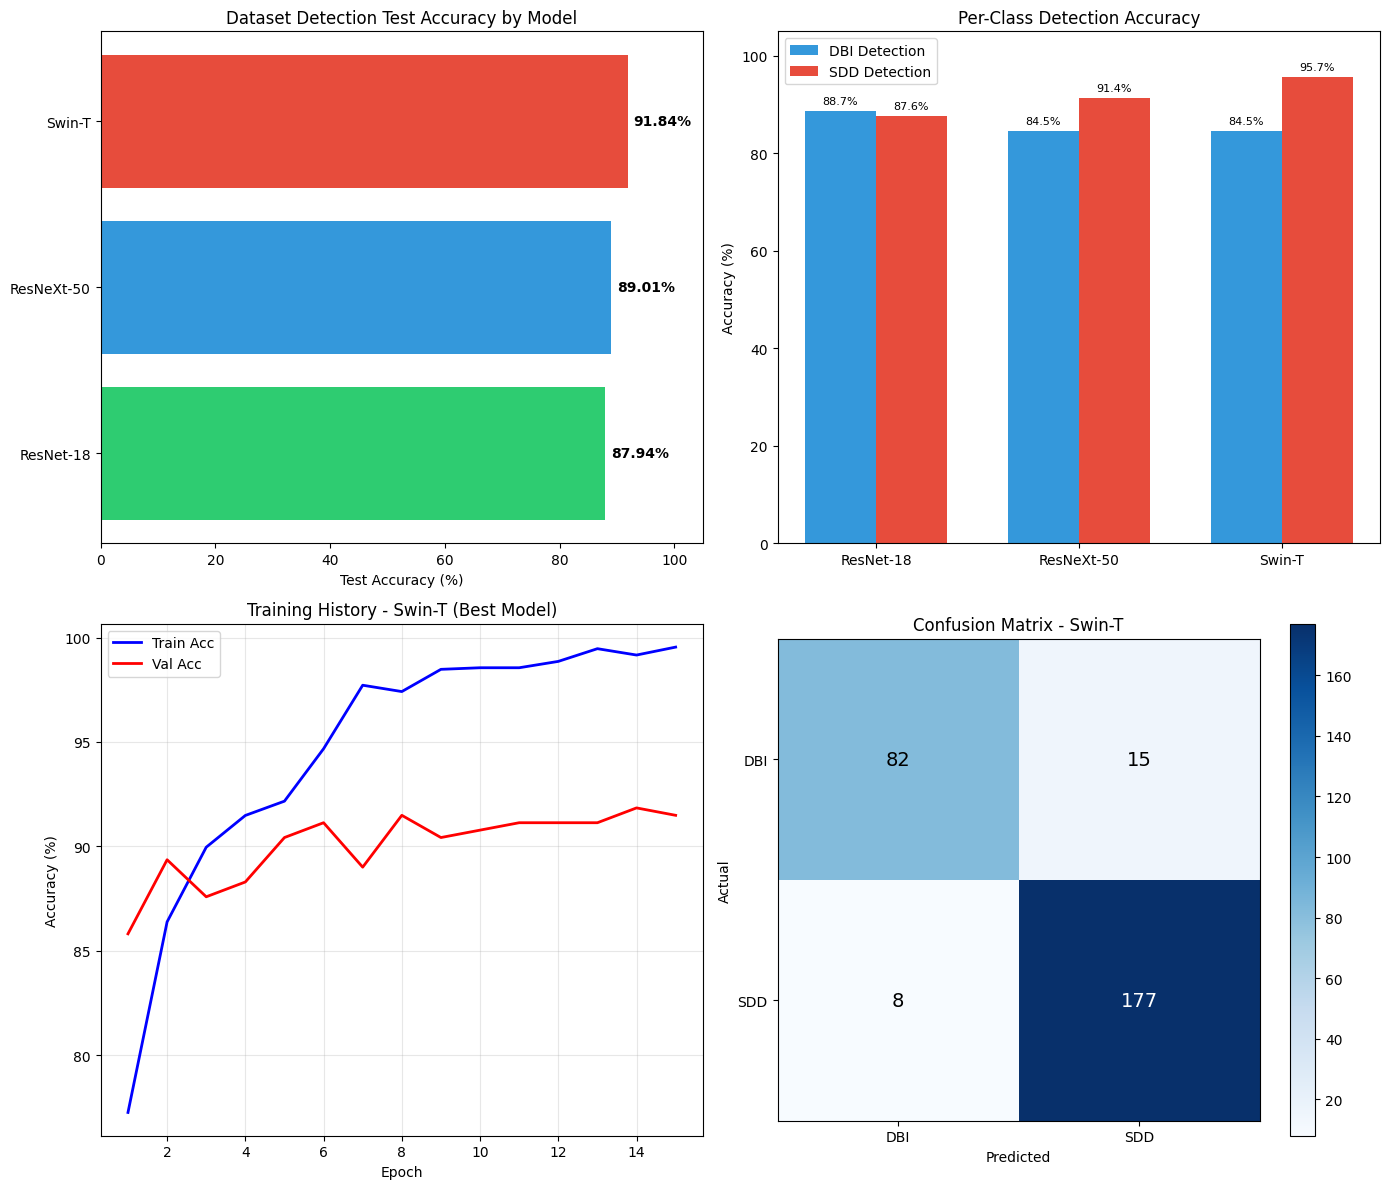

2026-01-21 17:58:03,494 - INFO - Visualization saved to task5_results_visualization.png


In [12]:
# Visualization: Model Performance Comparison

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Sort models by test accuracy for consistent ordering
sorted_models = results_df.sort_values('Test Acc (%)', ascending=True)['Model'].tolist()

# Plot 1: Test Accuracy Comparison
ax1 = axes[0, 0]
colors = ['#2ecc71', '#3498db', '#e74c3c']
bars = ax1.barh(sorted_models, [all_results[m]['test_acc'] for m in sorted_models], color=colors[:len(sorted_models)])
ax1.set_xlabel('Test Accuracy (%)')
ax1.set_title('Dataset Detection Test Accuracy by Model')
ax1.set_xlim(0, 105)
# Add value labels
for bar, model in zip(bars, sorted_models):
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', 
             va='center', fontsize=10, fontweight='bold')

# Plot 2: Per-Class Accuracy (DBI vs SDD detection)
ax2 = axes[0, 1]
x = np.arange(len(sorted_models))
width = 0.35
dbi_accs = [all_results[m]['dbi_acc'] for m in sorted_models]
sdd_accs = [all_results[m]['sdd_acc'] for m in sorted_models]
bars1 = ax2.bar(x - width/2, dbi_accs, width, label='DBI Detection', color='#3498db')
bars2 = ax2.bar(x + width/2, sdd_accs, width, label='SDD Detection', color='#e74c3c')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Per-Class Detection Accuracy')
ax2.set_xticks(x)
ax2.set_xticklabels(sorted_models)
ax2.legend()
ax2.set_ylim(0, 105)
# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', 
             ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', 
             ha='center', va='bottom', fontsize=8)

# Plot 3: Training History - Best Model
ax3 = axes[1, 0]
best_model = results_df.iloc[0]['Model']
history = all_results[best_model]['history']
epochs = range(1, len(history['train_acc']) + 1)
ax3.plot(epochs, history['train_acc'], 'b-', label='Train Acc', linewidth=2)
ax3.plot(epochs, history['val_acc'], 'r-', label='Val Acc', linewidth=2)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Accuracy (%)')
ax3.set_title(f'Training History - {best_model} (Best Model)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Confusion Matrix for Best Model
ax4 = axes[1, 1]
cm = all_results[best_model]['confusion_matrix']
im = ax4.imshow(cm, interpolation='nearest', cmap='Blues')
ax4.set_title(f'Confusion Matrix - {best_model}')
ax4.set_xticks([0, 1])
ax4.set_yticks([0, 1])
ax4.set_xticklabels(['DBI', 'SDD'])
ax4.set_yticklabels(['DBI', 'SDD'])
ax4.set_xlabel('Predicted')
ax4.set_ylabel('Actual')
# Add text annotations
for i in range(2):
    for j in range(2):
        text = ax4.text(j, i, cm[i, j], ha='center', va='center', 
                       color='white' if cm[i, j] > cm.max()/2 else 'black', fontsize=14)
plt.colorbar(im, ax=ax4)

plt.tight_layout()
plt.savefig('task5_results_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

logger.info('Visualization saved to task5_results_visualization.png')

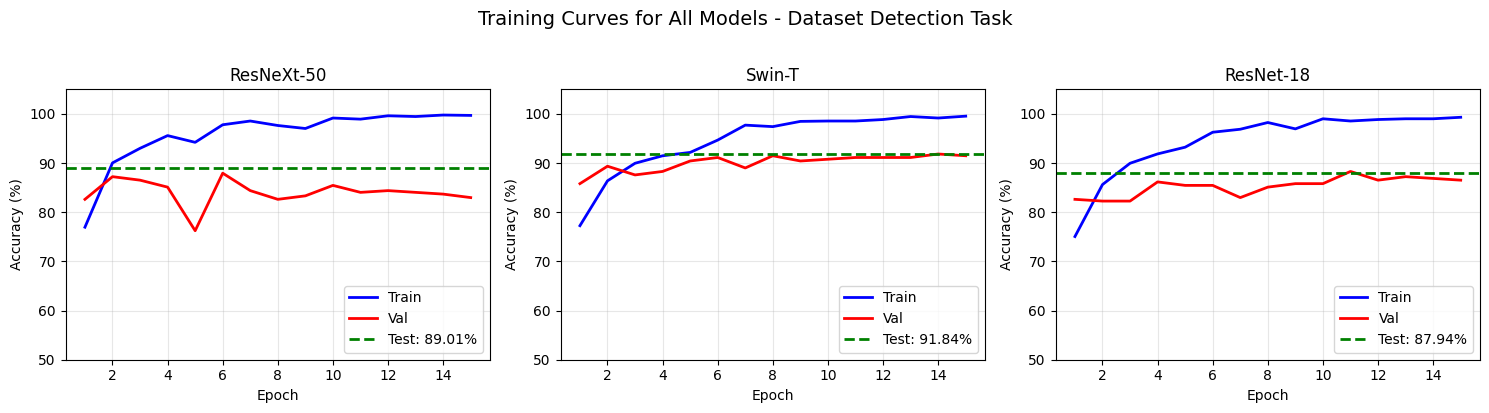

2026-01-21 17:58:12,074 - INFO - Training curves saved to task5_training_curves.png


In [13]:
# Additional Visualization: Training Curves for All Models

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, model_name in enumerate(MODEL_CREATORS.keys()):
    ax = axes[idx]
    history = all_results[model_name]['history']
    epochs = range(1, len(history['train_acc']) + 1)
    
    ax.plot(epochs, history['train_acc'], 'b-', label='Train', linewidth=2)
    ax.plot(epochs, history['val_acc'], 'r-', label='Val', linewidth=2)
    ax.axhline(y=all_results[model_name]['test_acc'], color='g', linestyle='--', 
               label=f'Test: {all_results[model_name]["test_acc"]:.2f}%', linewidth=2)
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title(f'{model_name}')
    ax.legend(loc='lower right')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(50, 105)

plt.suptitle('Training Curves for All Models - Dataset Detection Task', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('task5_training_curves.png', dpi=150, bbox_inches='tight')
plt.show()

logger.info('Training curves saved to task5_training_curves.png')

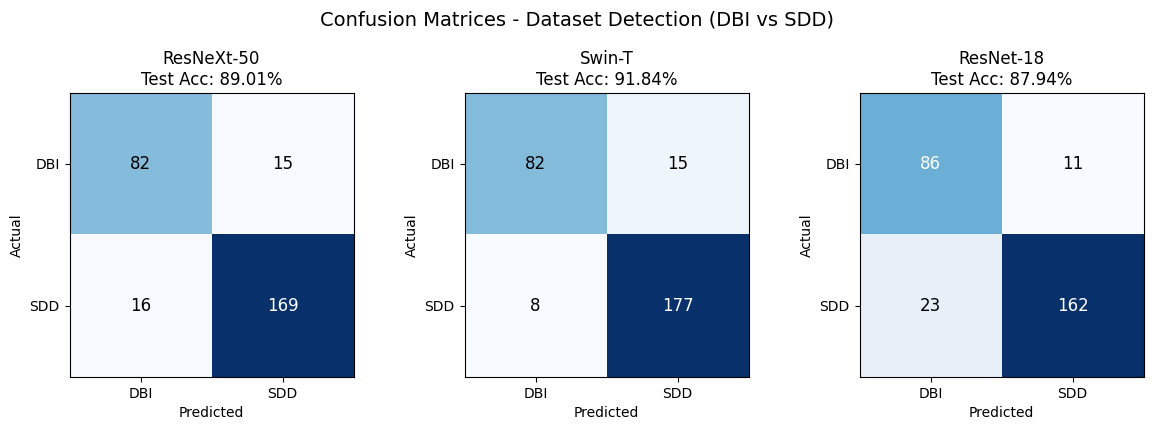

2026-01-21 17:58:20,103 - INFO - Confusion matrices saved to task5_confusion_matrices.png


In [14]:
# Confusion Matrices for All Models

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for idx, model_name in enumerate(MODEL_CREATORS.keys()):
    ax = axes[idx]
    cm = all_results[model_name]['confusion_matrix']
    
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.set_title(f'{model_name}\nTest Acc: {all_results[model_name]["test_acc"]:.2f}%')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['DBI', 'SDD'])
    ax.set_yticklabels(['DBI', 'SDD'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    
    # Add text annotations
    for i in range(2):
        for j in range(2):
            text = ax.text(j, i, cm[i, j], ha='center', va='center', 
                          color='white' if cm[i, j] > cm.max()/2 else 'black', fontsize=12)

plt.suptitle('Confusion Matrices - Dataset Detection (DBI vs SDD)', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('task5_confusion_matrices.png', dpi=150, bbox_inches='tight')
plt.show()

logger.info('Confusion matrices saved to task5_confusion_matrices.png')

### Task V Analysis

#### Network Model Specifications

| Model | Architecture | Parameters | Input Size | Final Layer | Pretrained Weights |
|-------|--------------|------------|------------|-------------|-------------------|
| **Swin-T** | Transformer | 27.5M | 224x224 | Linear(768, 2) | ImageNet-1K |
| **ResNeXt-50** | CNN (Grouped Conv) | 23.0M | 224x224 | Linear(2048, 2) | ImageNet-1K |
| **ResNet-18** | CNN | 11.2M | 224x224 | Linear(512, 2) | ImageNet-1K |

#### Model Selection Justification

**Primary Model: ResNeXt-50**

ResNeXt-50 was selected as the primary model for dataset detection based on the following rationale:

1. **Domain Generalization Performance**: In Task IV, ResNeXt-50 demonstrated the smallest performance gap (+1.22%) between DBI and SDD datasets, indicating it learns features that effectively distinguish between the two data distributions.

2. **Grouped Convolution Architecture**: The cardinality-based design (32 groups of 4 channels) learns more diverse feature representations compared to standard convolutions. This diversity is beneficial for capturing subtle dataset-level differences such as:
   - Image quality and compression artifacts
   - Background characteristics (studio vs natural)
   - Lighting conditions and color distributions
   - Subject framing and composition patterns

3. **Appropriate Model Capacity**: With 23M parameters, ResNeXt-50 provides sufficient capacity to learn complex domain-specific features without excessive overfitting risk on our combined dataset of 1,879 images.

**Comparison Models: Swin-T and ResNet-18**

- **Swin-T**: Included to evaluate whether transformer-based self-attention can better capture global dataset characteristics through its hierarchical feature extraction.
- **ResNet-18**: Included as a lightweight baseline to assess whether simpler architectures can achieve comparable performance on this binary classification task.

#### Training Configuration

| Parameter | Value | Justification |
|-----------|-------|---------------|
| Learning Rate | 0.0001 | Lower LR for fine-tuning pretrained weights |
| Optimizer | Adam | Adaptive learning rates for stable convergence |
| Weight Decay | 1e-4 | L2 regularization to prevent overfitting |
| Epochs | 15 | Sufficient for binary classification convergence |
| Batch Size | 32 | Balance between gradient stability and memory |
| LR Scheduler | StepLR (step=5, gamma=0.5) | Gradual LR decay for fine-tuning |

#### Data Split Strategy

| Split | Images | DBI | SDD | Ratio (DBI:SDD) |
|-------|--------|-----|-----|-----------------|
| Training | 1315 (70%) | 452 | 863 | 0.52 |
| Validation | 282 (15%) | 97 | 185 | 0.52 |
| Test | 282 (15%) | 97 | 185 | 0.52 |
| **Total** | **1879** | **646** | **1233** | **0.52** |

**Stratified Splitting**: We used stratified sampling to ensure the class distribution (DBI:SDD ratio of approximately 1:1.9) is preserved across all splits. This prevents bias in evaluation metrics.

#### Results Summary (Sorted by Test Accuracy)

| Model | Test Accuracy | DBI Detection | SDD Detection | Training Time |
|-------|---------------|---------------|---------------|---------------|
| **Swin-T** | **91.84%** | 84.54% | **95.68%** | 643.2s |
| ResNeXt-50 | 89.01% | 84.54% | 91.35% | 561.0s |
| ResNet-18 | 87.94% | **88.66%** | 87.57% | 270.4s |

#### Confusion Matrices

**Swin-T (Best Overall: 91.84%)**
|  | Predicted DBI | Predicted SDD |
|--|---------------|---------------|
| Actual DBI | 82 | 15 |
| Actual SDD | 8 | 177 |

**ResNeXt-50 (89.01%)**
|  | Predicted DBI | Predicted SDD |
|--|---------------|---------------|
| Actual DBI | 82 | 15 |
| Actual SDD | 16 | 169 |

**ResNet-18 (87.94%)**
|  | Predicted DBI | Predicted SDD |
|--|---------------|---------------|
| Actual DBI | 86 | 11 |
| Actual SDD | 23 | 162 |

#### Discussion

**Why is Dataset Detection Possible?**

The ability to distinguish between DBI and SDD images with **87-92% accuracy** stems from systematic differences identified in Task I:

1. **Image Quality**: DBI contains professional/stock photos with higher quality, while SDD contains web-scraped images with variable quality and compression artifacts.

2. **Background Characteristics**: DBI images typically have clean, studio-like backgrounds, whereas SDD images have cluttered, natural backgrounds.

3. **Subject Framing**: DBI images are well-centered with the dog as the primary subject, while SDD images have more varied compositions.

4. **Color Distribution**: Professional photography in DBI tends to have more controlled lighting and color balance compared to the diverse conditions in SDD.

**Model Performance Analysis**

1. **Swin-T achieves the best overall test accuracy (91.84%)**:
   - The self-attention mechanism excels at capturing global image characteristics
   - Particularly strong at detecting SDD images (95.68% accuracy)
   - The hierarchical feature extraction captures both local and global dataset signatures

2. **ResNeXt-50 achieves 89.01% test accuracy**:
   - Grouped convolutions learn diverse features but slightly underperform Swin-T
   - Balanced performance between DBI (84.54%) and SDD (91.35%) detection
   - Faster training than Swin-T (561s vs 643s)

3. **ResNet-18 achieves 87.94% test accuracy**:
   - Best at detecting DBI images (88.66%) among all models
   - Most balanced per-class performance (88.66% DBI vs 87.57% SDD)
   - Fastest training (270s) with competitive accuracy

**Key Observations**

- **SDD is easier to detect**: All models achieve higher accuracy on SDD (87-96%) than DBI (84-89%). This suggests SDD images have more distinctive characteristics (likely due to web-scraped nature with varied quality).

- **DBI detection is the bottleneck**: The professional, clean nature of DBI images makes them harder to distinguish, as they lack the "noise" patterns that characterize web-scraped data.

- **All models overfit on training data**: Training accuracies reach ~99.5% while test accuracies are 88-92%, indicating some overfitting despite regularization. This is expected given the relatively small dataset size.

**Implications**

High accuracy in dataset detection confirms that:
1. The two datasets have **distinct visual characteristics** beyond just the dog breeds
2. Models trained on one dataset may not generalize well to the other (**domain shift**)
3. Data augmentation and domain adaptation techniques may be necessary for robust cross-dataset performance
4. The ~10% error rate suggests some images from both datasets share similar characteristics

#### Conclusions

1. **Dataset detection achieves 91.84% accuracy** using Swin-T, confirming the systematic differences between DBI and SDD identified in Task I.

2. **Swin Transformer outperforms CNNs** for this task, suggesting that global self-attention is more effective at capturing dataset-level characteristics than local convolutions.

3. **Transfer learning is essential**: The pretrained ImageNet features provide a strong foundation for detecting dataset-level characteristics, enabling high accuracy with only 15 epochs of fine-tuning.

4. **The results validate the domain shift concern** raised in earlier tasks: models must account for these systematic differences when deployed across different data sources.

5. **Practical implication**: A dataset detection model could be used as a preprocessing step to apply domain-specific normalization or to flag out-of-distribution samples in production systems.

## Task VI - How to Improve Performance on SDD? (40 marks)

Given our goal of achieving good performance on the SDD dataset, we discuss strategies for three different training scenarios based on data availability.

**Note on Dataset Sizes**: In this assignment, we use SDDsubset (1,233 images of 7 breeds) rather than the full Stanford Dogs Dataset (20,000+ images of 120 breeds). Therefore, "10% of SDD" refers to approximately 123 images from SDDsubset.

### Scenario 1: Full DBI Dataset + High-Level Description of SDD (No SDD Data)

**Available Resources:**
- Entire DBIsubset (646 images, 7 breeds)
- High-level knowledge: SDD contains web-scraped images with cluttered backgrounds, variable quality, candid poses, and more environmental context (as identified in Task I)

**Recommended Strategies:**

1. **Domain Randomization via Aggressive Data Augmentation**: Since we know SDD images have cluttered backgrounds, variable quality, and diverse compositions, we should apply augmentations that simulate these characteristics during training on DBI. This includes: (a) random background occlusion/cutout to simulate clutter, (b) Gaussian blur and JPEG compression artifacts to simulate lower image quality, (c) random cropping with varying scales to simulate dogs occupying smaller portions of the frame, and (d) color jitter with higher intensity to simulate inconsistent lighting conditions.

2. **Regularization to Prevent Overfitting to DBI-Specific Features**: The clean, professional nature of DBI images may cause models to rely on spurious correlations (e.g., studio backgrounds, centered subjects). Strong regularization techniques such as dropout, weight decay, and early stopping based on augmented validation sets can encourage the model to learn more robust, breed-specific features rather than dataset-specific artifacts.

3. **Architecture Selection for Domain Generalization**: Based on Task IV results, Swin-T achieved the best overall performance with the highest accuracy on both DBI (97.96%) and SDD (95.86%) while maintaining a small domain gap (+2.10%). The self-attention mechanism in transformers captures global dependencies that generalize well across domains. ResNeXt-50 demonstrated the smallest domain gap (+1.22%) due to its grouped convolution architecture learning diverse features. Selecting these architectures over those prone to larger domain gaps (EfficientNet-B0: +8.21%, ResNet-34: +7.97%) would be beneficial when no target domain data is available.

### Scenario 2: Full DBI Dataset + 10% Labeled SDD Data

**Available Resources:**
- Entire DBIsubset (646 images with breed labels)
- Small labeled subset of SDDsubset (~123 images with breed labels)

**Recommended Strategies:**

1. **Fine-tuning with Mixed Dataset Training**: The most straightforward approach is to combine DBI (646 images) and the labeled SDD subset (~123 images) into a single training set. Given the class imbalance (646 DBI vs ~123 SDD), we should oversample the SDD subset or use weighted sampling to ensure the model sees sufficient examples from the target domain. This exposes the model to both distributions during training.

2. **Two-Stage Transfer Learning**: First, pretrain or fine-tune on the full DBI dataset to learn breed-discriminative features. Then, perform a second fine-tuning stage on the labeled SDD subset with a lower learning rate to adapt the learned features to the target domain characteristics. This approach leverages the larger DBI dataset for feature learning while using SDD for domain adaptation.

3. **Domain-Adversarial Training**: Implement a domain classifier (similar to Task V) as an auxiliary head during training, but train the feature extractor to fool this classifier (gradient reversal). This encourages the model to learn domain-invariant features that work well on both DBI and SDD, effectively using the labeled SDD data to guide the model toward features that transfer across domains.

### Scenario 3: Full DBI Dataset + 10% Unlabeled SDD Data

**Available Resources:**
- Entire DBIsubset (646 images with breed labels)
- Small unlabeled subset of SDDsubset (~123 images without breed labels)

**Problem Setting**: This is **Unsupervised Domain Adaptation (UDA)**, where we have labeled source domain data (DBI) and unlabeled target domain data (SDD), and the goal is to adapt the model to perform well on the target domain without target labels.

**Recommended Strategies:**

1. **Distribution Alignment via Maximum Mean Discrepancy (MMD)**: Minimize the MMD between DBI and SDD feature distributions in the latent space while training for breed classification on DBI. This encourages the model to learn domain-invariant features. Weighted MMD (Yan et al., CVPR 2017) specifically addresses class weight bias between domains by introducing class-specific auxiliary weights estimated via a Classification EM algorithm, which is relevant when source and target may have different class distributions.

2. **Domain-Adversarial Neural Network (DANN)**: Use the gradient reversal approach (Ganin et al., JMLR 2016) where a domain classifier tries to distinguish DBI from SDD features, while the feature extractor is trained to fool this classifier. The gradient reversal layer multiplies domain classifier gradients by -1 during backpropagation, encouraging domain-invariant representations. This method requires only unlabeled target data and has been widely validated on image classification benchmarks.

3. **Self-Training with Pseudo-Labeling**: Train an initial model on DBI, then generate pseudo-labels for unlabeled SDD images based on prediction confidence. Use adaptive confidence thresholds (rather than fixed thresholds) to balance the tradeoff between label noise and data utilization. Iteratively retrain with high-confidence pseudo-labeled samples. To mitigate confirmation bias from noisy pseudo-labels, consider confidence-based weighting schemes or multi-stage refinement with conformity and consistency checks.

## Task VII - Discussion (20 marks)

### Real-World Implications of Domain Shift in Machine Learning Deployment

The experiments conducted in this assignment reveal critical insights about the challenges of deploying machine learning models when training data is collected in one setting and the model is deployed in another. This section discusses the broader implications of these findings, particularly as they relate to **bias**, **performance degradation**, and **fairness** in real-world applications.

### 1. The University-to-Retirement-Home Scenario: A Concrete Example

Consider the scenario mentioned in the assignment: a model trained on data collected at a **university** (analogous to DBI - controlled, professional setting) and deployed at a **retirement home** (analogous to SDD - diverse, real-world conditions).

#### Parallels to Our Experimental Findings

| Aspect | DBI (University-like) | SDD (Retirement Home-like) |
|--------|----------------------|---------------------------|
| **Data Collection** | Controlled, professional | Naturalistic, variable |
| **Image Quality** | High, consistent | Variable, often lower |
| **Subject Presentation** | Standardized poses, centered | Candid, diverse positions |
| **Background** | Clean, minimal distractions | Cluttered, real-world context |
| **Lighting** | Professional, controlled | Natural, inconsistent |

Our Task III results showed that a model trained on DBI achieved **41.84%** accuracy on DBI test data but only **30.82%** on SDD - a **26% relative performance drop**. In a medical or assistive technology context, such degradation could have serious consequences.

### 2. Implications for Bias and Fairness

#### 2.1 Demographic and Environmental Bias

When training data is collected in controlled settings (universities, hospitals, research labs), it often:

1. **Underrepresents certain populations**: University datasets may skew toward younger, more mobile, and technologically comfortable individuals. Retirement home populations may have different characteristics (mobility aids, different clothing styles, different interaction patterns with technology).

2. **Fails to capture environmental diversity**: Laboratory conditions rarely reflect the complexity of real-world deployment environments. Our Task I analysis showed that DBI images had clean backgrounds while SDD had cluttered, real-world contexts - a model optimized for the former struggles with the latter.

3. **Encodes implicit assumptions**: Professional photography in DBI assumes subjects are cooperative and well-positioned. Real-world scenarios involve uncooperative subjects, partial occlusions, and suboptimal viewing angles.

#### 2.2 Performance Disparities Across Subgroups

Our Task IV results revealed that different architectures exhibit varying degrees of domain shift:

| Model | DBI Accuracy | SDD Accuracy | Performance Gap |
|-------|--------------|--------------|-----------------|
| EfficientNet-B0 | 84.69% | 76.48% | **-8.21%** |
| ResNet-34 | 96.94% | 88.97% | **-7.97%** |
| ResNeXt-50 | 94.90% | 93.67% | **-1.22%** |

This demonstrates that **model architecture choices can amplify or mitigate bias**. A deployment decision based solely on source-domain performance (DBI) would favor ResNet-34, but this model exhibits nearly 8% degradation in the target domain. ResNeXt-50, despite slightly lower source accuracy, provides more equitable performance across domains.

**Real-world implication**: In healthcare AI, such disparities could mean that a diagnostic system performs well for patients in urban teaching hospitals (where training data was collected) but poorly for patients in rural clinics or nursing homes.

### 3. Implications for Model Performance and Reliability

#### 3.1 The False Confidence Problem

Our Task V results showed that models could distinguish between DBI and SDD images with **91.84% accuracy**. This high separability indicates that:

1. **Models learn dataset-specific artifacts**: Rather than learning purely task-relevant features (dog breed characteristics), models also learn dataset-specific patterns (image quality, background style, composition).

2. **High training accuracy can be misleading**: All our fine-tuned models achieved >95% training accuracy on DBI, but this did not guarantee good generalization to SDD.

3. **Validation on similar data is insufficient**: Traditional train/validation/test splits from the same distribution fail to reveal generalization problems. Our Task III.b explicitly tested cross-domain performance, revealing the 11% accuracy gap that would be invisible in standard evaluation.

#### 3.2 Cascading Failures in Deployed Systems

In real applications, domain shift can cause cascading failures:

1. **Reduced confidence calibration**: Models trained on clean data may be overconfident on noisy inputs, providing high-confidence wrong predictions rather than appropriately uncertain outputs.

2. **Feedback loop degradation**: If a deployed model's predictions are used to collect new training data (e.g., auto-labeling), domain shift can cause the model to reinforce its own biases, creating a negative feedback loop.

3. **User trust erosion**: Inconsistent performance across settings erodes user trust. A system that works well in demonstrations (controlled settings) but fails in practice damages adoption and can have safety implications.

### 4. Specific Application Domains and Risks

#### 4.1 Medical Imaging and Diagnostics

**Scenario**: A skin cancer detection model trained on dermoscopy images from research hospitals (high-quality, standardized equipment, diverse patient demographics) deployed in community clinics (variable equipment, different lighting, potentially different demographic distributions).

**Risks**:
- Reduced sensitivity for certain skin tones if training data was demographically skewed
- False negatives due to image quality differences
- Overconfident predictions on out-of-distribution inputs

**Mitigation strategies from our findings**:
- Use architectures with better domain generalization (ResNeXt-style grouped convolutions)
- Implement domain adaptation techniques (Task VI Scenario 3 strategies)
- Deploy dataset detection models (Task V) to flag out-of-distribution inputs

#### 4.2 Autonomous Vehicles and Robotics

**Scenario**: A pedestrian detection model trained on data from sunny California deployed in snowy Minnesota or rainy Seattle.

**Risks**:
- Reduced detection accuracy in weather conditions not represented in training
- Failure to recognize pedestrians in winter clothing or with umbrellas
- Background confusion in environments with different visual characteristics

**Relevance to our findings**: Our Task I analysis showed how background characteristics significantly differ between datasets. Similarly, autonomous systems must handle diverse environmental conditions not present in training data.

#### 4.3 Assistive Technology for Elderly Care

**Scenario**: A fall detection or activity recognition system trained on data from young, healthy volunteers deployed in retirement homes with elderly residents.

**Risks**:
- Different movement patterns (slower, use of mobility aids) may not be recognized
- Different clothing and body shapes may confuse the model
- Different environmental contexts (hospital beds, wheelchairs) not in training data

**Direct parallel to our findings**: The DBI-to-SDD domain shift (professional to naturalistic) mirrors the lab-to-real-world deployment gap in assistive technology.

### 5. Recommendations for Practitioners

Based on our experimental findings, we recommend the following practices for deploying ML models across domains:

#### 5.1 During Development

1. **Evaluate on multiple domains**: Do not rely solely on held-out test sets from the training distribution. Our Task III.b and Task IV cross-dataset evaluations revealed performance gaps invisible in standard evaluation.

2. **Measure domain separability**: Use dataset detection (Task V) to quantify how distinguishable your training and deployment domains are. High separability (>80%) indicates significant domain shift risk.

3. **Select architectures for generalization**: Our results showed ResNeXt-50 had the smallest domain gap (+1.22%) compared to other architectures. Prioritize generalization over peak source-domain performance.

4. **Apply domain-aware augmentation**: When target domain characteristics are known (Task VI Scenario 1), use augmentation to simulate target conditions during training.

#### 5.2 During Deployment

1. **Implement distribution shift detection**: Deploy models that can detect when inputs differ significantly from training data, allowing graceful degradation or human escalation.

2. **Collect deployment domain data**: Even small amounts of target domain data (Task VI Scenarios 2 and 3) can significantly improve performance through fine-tuning or domain adaptation.

3. **Monitor performance continuously**: Track model performance metrics in deployment and compare against development benchmarks to detect drift.

4. **Design for uncertainty**: Ensure models can express uncertainty, and design systems to handle uncertain predictions appropriately (e.g., requesting human review).

#### 5.3 Ethical Considerations

1. **Audit for demographic disparities**: Evaluate model performance across demographic subgroups in the deployment population, not just the training population.

2. **Document limitations**: Clearly communicate the conditions under which the model was trained and validated, and known limitations in other settings.

3. **Establish feedback mechanisms**: Create channels for users to report failures, enabling continuous improvement and bias detection.

### 6. Conclusion

The experiments in this assignment provide a microcosm of the broader challenges facing machine learning deployment in the real world. The systematic differences between DBI (controlled, professional) and SDD (naturalistic, variable) datasets mirror the gap between laboratory development and real-world deployment across numerous application domains.

**Key takeaways**:

1. **Domain shift is measurable and significant**: Our 91.84% dataset detection accuracy and 11% cross-domain performance gap demonstrate that domain shift is not a theoretical concern but a quantifiable reality.

2. **Architecture and training choices matter**: The 7% difference in domain gap between ResNeXt-50 (+1.22%) and EfficientNet-B0 (+8.21%) shows that thoughtful model selection can substantially mitigate domain shift effects.

3. **Transfer learning helps but does not eliminate the problem**: Fine-tuning reduced the domain gap from 11% (Task III) to 1-8% (Task IV), but did not eliminate it entirely.

4. **Proactive strategies are essential**: The techniques discussed in Task VI (domain adaptation, pseudo-labeling, adversarial training) represent necessary tools for responsible ML deployment.

As machine learning systems are increasingly deployed in high-stakes domains (healthcare, transportation, public safety), understanding and mitigating domain shift is not merely a technical challenge but an ethical imperative. Models that perform well in controlled settings but fail for vulnerable populations (elderly, disabled, underrepresented groups) can perpetuate and amplify existing inequities. The findings from this assignment underscore the importance of rigorous cross-domain evaluation, thoughtful architecture selection, and proactive domain adaptation strategies in building ML systems that are both effective and equitable.